In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { margin-left: 25%; width:70% !important; }</style>"))

In [3]:
%config Application.log_level="DEBUG"
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
import os.path

In [5]:
from tabulate import tabulate
from pprint import pprint

In [6]:
from fireworks.utilities.wfb import WorkflowBuilder

In [7]:
import scipy.constants as C

In [8]:
10 /C.angstrom * C.femto # m / s -> Ang / fs

0.0001

In [9]:
1 / C.angstrom * C.femto # m / s -> Ang / fs

1e-05

In [10]:
def meterPerSecondToAngstromPerFemtosecond(v):
    return v / C.angstrom * C.femto

In [11]:
def totalStepsFromVelocityInAngstromPerFemtosecond(v_in_Ang_per_fs,dt=2,d=30): # dt in fs, d in Angstrom
    return d / v_in_Ang_per_fs / dt

In [12]:
totalStepsFromVelocityInAngstromPerFemtosecond( meterPerSecondToAngstromPerFemtosecond(1), dt=2, d=30)

1499999.9999999998

## NEMO Trials

In [151]:
prefix= '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production'
wfb = WorkflowBuilder(os.path.join(prefix,'system_trial_nemo.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build_trial_nemo')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production/system_trial_nemo.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 7 nodes: ['fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml', 'fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 9 edges: [('fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml'), ('fw_020_production_file_retrieval.yaml', 'fw_050_production.yaml'), ('fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml'), ('fw_050_production.yaml', 'fw_060_recover_failed.yaml'), ('fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml'), ('fw_060_recover_failed.yaml', 'fw_200_results_to_filepad

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_020_production_file_retrieval.yaml_000010:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval':

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_030_datafile_retrieval.yaml_000030:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'min

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembl

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_050_production.yaml_000010_000030_000060
INFO:fireworks.utilities.wfb:Added vertex 24 - fw_060_recover_failed.yaml_000010_000030_000060
INFO:fireworks.utilities.wfb:Added vertex 25 - fw_100_extract_property.yaml_000010_000030_000060
INFO:fireworks.utilities.wfb:Added vertex 26 - fw_200_results_to_filepad.yaml_000010_000030_000060
INFO:fireworks.utilities.wfb:Added vertex 27 - fw_250_results_to_storage.yaml_000010_000030_000060
INFO:fireworks.utilities.wfb:Added edge 34 - (0-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (7-23)
INFO:fireworks.utilities.wfb:Added edge 36 - (23-24)
INFO:fireworks.utilities.wfb:Added edge 37 - (24-25)
INFO:fireworks.utilities.wfb:Added edge 38 - (24-26)
INFO:fireworks.utilities.wfb:Added edge 39 - (24-27)
INFO:fireworks.utilities.wfb:Added edge 40 - (25-26)
INFO:fireworks.utilities.wfb:Added edge 41 - (25-27)
INFO:fireworks.utilities.wfb:          Instance 23 - 60 - fw_050_production.yaml_000060 of class 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

INFO:fireworks.utilities.wfb:  Iterating parent fw_060_recover_failed.yaml_000070:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'pr

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 6
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000080
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_250_results_to_storage.yaml_000010_000030_000060_000070_000080_000090
INFO:fireworks.utilities.wfb:Added edge 34 - (20-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (19-23)
INFO:fireworks.utilities.wfb:          Instance 23 - 90 - fw_250_results_to_storage.yaml_000090 of class 22 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 22, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 22: fw_250_results_to_storage.yaml_000090
INFO:fireworks.utilities.wfb:Current topological order: [0, 7, 18, 19, 20, 22, 21, 13, 14, 15, 17, 16, 8, 9, 10, 12, 11, 1, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_00

DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 'at polar heads', 'constant_indenter_velocity': -1e-05, 'constant_inde

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_recover_failed.yaml_000110:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal',

INFO:fireworks.utilities.wfb:Iterating node 21: fw_250_results_to_storage.yaml_000010_000030_000050_000110_000120
INFO:fireworks.utilities.wfb:21: fw_250_results_to_storage.yaml_000010_000030_000050_000110_000120, dist. 5, top.pos. 6 has 2 parents with distances [3, 4]:
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000110, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:  22: fw_100_extract_property.yaml_000120, dist. 4, top. pos. 5
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [22]
INFO:fireworks.utilities.wfb:  22: fw_100_extract_property.yaml_000120, dist. 4, top. pos. 5 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 6
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000120
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker':

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_250_results_to_storage.yaml_000010_000030_000050_000110_000120_000130
INFO:fireworks.utilities.wfb:Added edge 34 - (19-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (22-23)
INFO:fireworks.utilities.wfb:          Instance 23 - 130 - fw_250_results_to_storage.yaml_000130 of class 21 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 21, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 21: fw_100_extract_property.yaml_000120
INFO:fireworks.utilities.wfb:Current topological order: [0, 7, 14, 15, 16, 18, 17, 13, 19, 21, 22, 20, 8, 9, 10, 12, 11, 1, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000040:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'mi

INFO:fireworks.utilities.wfb:18: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_extract_property.yaml_000010_000030_000040_000150.
INFO:fireworks.utilities.wfb:Iterating node 20: fw_100_extract_property.yaml_000010_000030_000040_000150
INFO:fireworks.utilities.wfb:20: fw_100_extract_property.yaml_000010_000030_000040_000150, dist. 4, top.pos. 4 has 1 parents with distances [3]:
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000150, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [19]
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000150, dist. 3, top. pos. 3 sel

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_100_extract_property.yaml_000010_000030_000040_000150_000160
INFO:fireworks.utilities.wfb:Added vertex 24 - fw_200_results_to_filepad.yaml_000010_000030_000040_000150_000160
INFO:fireworks.utilities.wfb:Added vertex 25 - fw_250_results_to_storage.yaml_000010_000030_000040_000150_000160
INFO:fireworks.utilities.wfb:Added edge 34 - (23-24)
INFO:fireworks.utilities.wfb:Added edge 35 - (23-25)
INFO:fireworks.utilities.wfb:Added edge 36 - (19-23)
INFO:fireworks.utilities.wfb:Added edge 37 - (19-24)
INFO:fireworks.utilities.wfb:Added edge 38 - (19-25)
INFO:fireworks.utilities.wfb:          Instance 23 - 160 - fw_100_extract_property.yaml_000160 of class 20 - fw_100_extract_property.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.u

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 0, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000160:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal

INFO:fireworks.utilities.wfb:22: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_050_production.yaml_000010_000020.
INFO:fireworks.utilities.wfb:Iterating node 2: fw_050_production.yaml_000010_000020
INFO:fireworks.utilities.wfb:2: fw_050_production.yaml_000010_000020, dist. 2, top.pos. 10 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_020_production_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  1: fw_030_datafile_retrieval.yaml_000020, dist. 1, top. pos. 7
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [1]
INFO:fireworks.utilities.wfb:  1: fw_030_datafile_retrieval.yaml_000020, dist. 1, top. pos. 7 selected as immediate parent
INFO:fireworks.utili

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_050_production.yaml_000010_000020_000190
INFO:fireworks.utilities.wfb:Added vertex 24 - fw_060_recover_failed.yaml_000010_000020_000190
INFO:fireworks.utilities.wfb:Added vertex 25 - fw_100_extract_property.yaml_000010_000020_000190
INFO:fireworks.utilities.wfb:Added vertex 26 - fw_200_results_to_filepad.yaml_000010_000020_000190
INFO:fireworks.utilities.wfb:Added vertex 27 - fw_250_results_to_storage.yaml_000010_000020_000190
INFO:fireworks.utilities.wfb:Added edge 34 - (0-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (1-23)
INFO:fireworks.utilities.wfb:Added edge 36 - (23-24)
INFO:fireworks.utilities.wfb:Added edge 37 - (24-25)
INFO:fireworks.utilities.wfb:Added edge 38 - (24-26)
INFO:fireworks.utilities.wfb:Added edge 39 - (24-27)
INFO:fireworks.utilities.wfb:Added edge 40 - (25-26)
INFO:fireworks.utilities.wfb:Added edge 41 - (25-27)
INFO:fireworks.utilities.wfb:          Instance 23 - 190 - fw_050_production.yaml_000190 of class

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preas

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000210:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal',

INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_050_production.yaml_000210 has been v

INFO:fireworks.utilities.wfb:Added vertex 33 - fw_200_results_to_filepad.yaml_000010_000020_000210_000220_000230
INFO:fireworks.utilities.wfb:Added vertex 34 - fw_250_results_to_storage.yaml_000010_000020_000210_000220_000230
INFO:fireworks.utilities.wfb:Added vertex 35 - fw_100_extract_property.yaml_000010_000020_000210_000220_000230
INFO:fireworks.utilities.wfb:Added edge 50 - (30-35)
INFO:fireworks.utilities.wfb:Added edge 51 - (30-33)
INFO:fireworks.utilities.wfb:Added edge 52 - (30-34)
INFO:fireworks.utilities.wfb:Added edge 53 - (35-33)
INFO:fireworks.utilities.wfb:Added edge 54 - (35-34)
INFO:fireworks.utilities.wfb:          Instance 35 - 230 - fw_100_extract_property.yaml_000230 of class 31 - fw_100_extract_property.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.u

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1500000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000230:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': '

INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_050_production.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_060_recover_failed.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_100_extract_property.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_200_results_to_filepad.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_250_results_to_storage.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_050_production.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_060_recover_failed.yaml_000010_000020_0002

INFO:fireworks.utilities.wfb:Added vertex 33 - fw_060_recover_failed.yaml_000010_000020_000200_000260
INFO:fireworks.utilities.wfb:Added vertex 34 - fw_100_extract_property.yaml_000010_000020_000200_000260
INFO:fireworks.utilities.wfb:Added vertex 35 - fw_200_results_to_filepad.yaml_000010_000020_000200_000260
INFO:fireworks.utilities.wfb:Added vertex 36 - fw_250_results_to_storage.yaml_000010_000020_000200_000260
INFO:fireworks.utilities.wfb:Added edge 50 - (23-33)
INFO:fireworks.utilities.wfb:Added edge 51 - (33-34)
INFO:fireworks.utilities.wfb:Added edge 52 - (33-35)
INFO:fireworks.utilities.wfb:Added edge 53 - (33-36)
INFO:fireworks.utilities.wfb:Added edge 54 - (34-35)
INFO:fireworks.utilities.wfb:Added edge 55 - (34-36)
INFO:fireworks.utilities.wfb:          Instance 33 - 260 - fw_060_recover_failed.yaml_000260 of class 24 - fw_060_recover_failed.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persi

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000270:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '96:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal

INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_050_production.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_recover_failed.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_100_extract_property.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_250_results_to_storage.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_050_production.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_060_recover_failed.yaml_000260 has been vi

INFO:fireworks.utilities.wfb:Added vertex 33 - fw_250_results_to_storage.yaml_000010_000020_000200_000260_000270_000290
INFO:fireworks.utilities.wfb:Added edge 50 - (29-33)
INFO:fireworks.utilities.wfb:Added edge 51 - (31-33)
INFO:fireworks.utilities.wfb:          Instance 33 - 290 - fw_250_results_to_storage.yaml_000290 of class 30 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 30, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 30: fw_100_extract_property.yaml_000270
INFO:fireworks.utilities.wfb:Current topological order: [0, 2, 5, 6, 7, 9, 8, 4, 10, 11, 13, 12, 3, 14, 15, 17, 16, 1, 24, 25, 26, 28, 27, 23, 29, 30, 32, 31, 18, 19, 20, 22, 21]
INFO:fireworks.utilities.wfb:0: f

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 0, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_recover_failed.yaml_000300:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal',

INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_050_production.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_060_recover_failed.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_100_extract_property.yaml_000230 has been visit

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 150000, 'use_dpd_tstat': 0, 'use_barostat': 0, 'ci_preassembly': 'a

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000310:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 5, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal

INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_050_production.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_060_recover_failed.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_100_extract_property.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_200_results_to_filepad.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_250_results_to_storage.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_050_production.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_recover_failed.yaml_000260 has been vi

INFO:fireworks.utilities.wfb:fw_id -310: fw_250_results_to_storage.yaml_000240
INFO:fireworks.utilities.wfb:fw_id -320: fw_250_results_to_storage.yaml_000290
INFO:fireworks.utilities.wfb:fw_id -330: fw_250_results_to_storage.yaml_000330


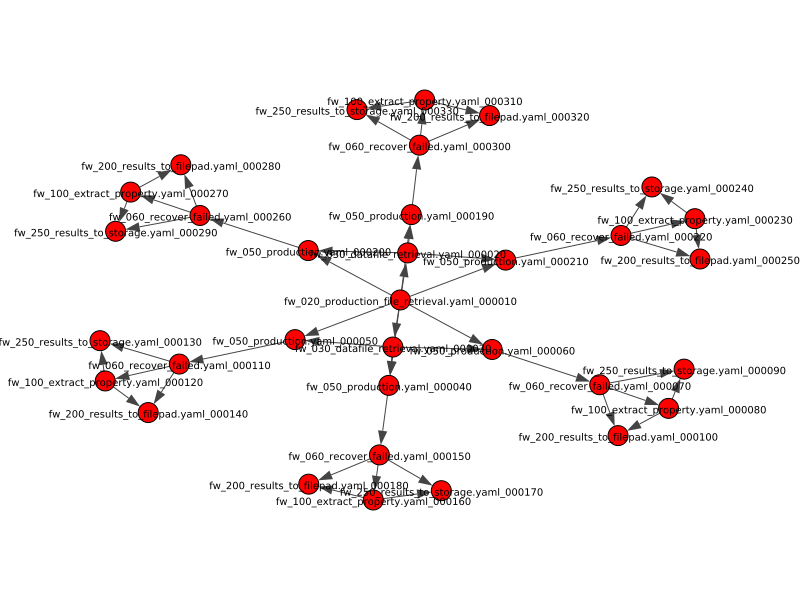

In [152]:
wfb.plot()

## NEMO Express Trials

In [147]:
prefix= '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production'
wfb = WorkflowBuilder(os.path.join(prefix,'system_express_trial_nemo.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build_express_trial_nemo')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production/system_express_trial_nemo.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 7 nodes: ['fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml', 'fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 9 edges: [('fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml'), ('fw_020_production_file_retrieval.yaml', 'fw_050_production.yaml'), ('fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml'), ('fw_050_production.yaml', 'fw_060_recover_failed.yaml'), ('fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml'), ('fw_060_recover_failed.yaml', 'fw_200_results_to

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 

DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly': 'at polar heads', 'constant_indenter_velocity': -0.0001, 'constant_indenter_velocity_un

INFO:fireworks.utilities.wfb:Added vertex 7 - fw_050_production.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 8 - fw_060_recover_failed.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 9 - fw_100_extract_property.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 10 - fw_200_results_to_filepad.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 11 - fw_250_results_to_storage.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added edge 9 - (0-7)
INFO:fireworks.utilities.wfb:Added edge 10 - (1-7)
INFO:fireworks.utilities.wfb:Added edge 11 - (7-8)
INFO:fireworks.utilities.wfb:Added edge 12 - (8-9)
INFO:fireworks.utilities.wfb:Added edge 13 - (8-10)
INFO:fireworks.utilities.wfb:Added edge 14 - (8-11)
INFO:fireworks.utilities.wfb:Added edge 15 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 16 - (9-11)
INFO:fireworks.utilities.wfb:          Instance 7 - 30 - fw_050_production.yaml_000030 of class 2 - fw_050_prod

INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_060_recover_failed.yaml_000010_000020_000040.
INFO:fireworks.utilities.wfb:Iterating node 8: fw_060_recover_failed.yaml_000010_000020_000040
INFO:fireworks.utilities.wfb:8: fw_060_recover_failed.yaml_000010_000020_000040, dist. 3, top.pos. 3 has 1 parents with distances [2]:
INFO:fireworks.utilities.wfb:  7: fw_050_production.yaml_000040, dist. 2, top. pos. 2
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [7]
INFO:fireworks.utilities.wfb:  7: fw_050_production.yaml_000040, dist. 2, top. pos. 2 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 2
DEBUG:fireworks.utilities.wfb:  Parent 

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_060_recover_failed.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_100_extract_property.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_200_results_to_filepad.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_250_results_to_storage.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added edge 17 - (7-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (12-13)
INFO:fireworks.utilities.wfb:Added edge 19 - (12-14)
INFO:fireworks.utilities.wfb:Added edge 20 - (12-15)
INFO:fireworks.utilities.wfb:Added edge 21 - (13-14)
INFO:fireworks.utilities.wfb:Added edge 22 - (13-15)
INFO:fireworks.utilities.wfb:          Instance 12 - 50 - fw_060_recover_failed.yaml_000050 of class 8 - fw_060_recover_failed.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persiten

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 1, 'use_barostat': 0, 'ci_preassembly

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000060:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 10000

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000060:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit'

DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 0, 'use_barostat': 0, 'ci_preassembly': 'at polar heads', 'constant_indenter_velocity': -0.0001, 'constant_indenter_velocity_un

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_060_recover_failed.yaml_000010_000020_000030_000090
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_100_extract_property.yaml_000010_000020_000030_000090
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_200_results_to_filepad.yaml_000010_000020_000030_000090
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_250_results_to_storage.yaml_000010_000020_000030_000090
INFO:fireworks.utilities.wfb:Added edge 17 - (2-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (12-13)
INFO:fireworks.utilities.wfb:Added edge 19 - (12-14)
INFO:fireworks.utilities.wfb:Added edge 20 - (12-15)
INFO:fireworks.utilities.wfb:Added edge 21 - (13-14)
INFO:fireworks.utilities.wfb:Added edge 22 - (13-15)
INFO:fireworks.utilities.wfb:          Instance 12 - 90 - fw_060_recover_failed.yaml_000090 of class 3 - fw_060_recover_failed.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persiten

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 10000, 'minimization_maxeval': 100000, 'nvt_equilibration_steps': 10000, 'npt_equilibration_steps': 10000, 'production_steps': 1000, 'use_dpd_tstat': 0, 'use_barostat': 0, 'ci_preassembly

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000100:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_ftol': 1e-05, 'minimization_ftol_unit'

INFO:fireworks.utilities.wfb:  9: fw_100_extract_property.yaml_000100, dist. 4, top. pos. 9
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [9]
INFO:fireworks.utilities.wfb:  9: fw_100_extract_property.yaml_000100, dist. 4, top. pos. 9 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 2
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000100
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '00:15:00', 'queue': 'express', 'worker': 'nemo_noqueue', 'postp_worker': 'nemo_noqueue', 'restart_worker': 'nemo_queue_offline', 'max_restarts': 1, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_freque

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_200_results_to_filepad.yaml_000010_000020_000030_000090_000100_000120
INFO:fireworks.utilities.wfb:Added edge 17 - (8-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (9-12)
INFO:fireworks.utilities.wfb:          Instance 12 - 120 - fw_200_results_to_filepad.yaml_000120 of class 10 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 10, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 10: fw_250_results_to_storage.yaml_000110
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 3, 4, 5, 7, 6, 2, 8, 9, 11, 10]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000010 has been visited before, move on.
INFO:f

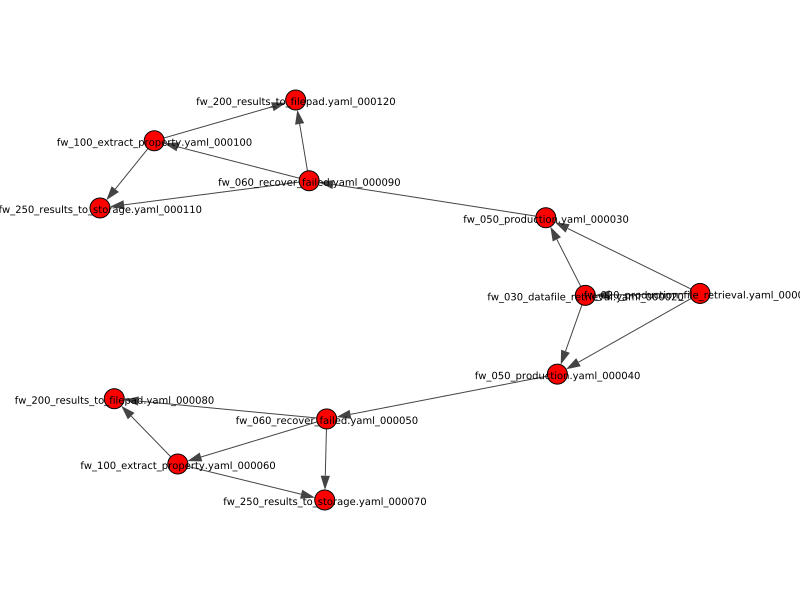

In [144]:
wfb.plot()

## JUWELS TRIALS

In [20]:
prefix= '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production'
wfb = WorkflowBuilder(os.path.join(prefix,'system_trial_juwels.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build_trial_juwels')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production/system_trial_juwels.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 7 nodes: ['fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml', 'fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 9 edges: [('fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml'), ('fw_020_production_file_retrieval.yaml', 'fw_050_production.yaml'), ('fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml'), ('fw_050_production.yaml', 'fw_060_recover_failed.yaml'), ('fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml'), ('fw_060_recover_failed.yaml', 'fw_200_results_to_filep

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimiza

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{'sf_nmolecules': 646, 'sf_preassembly': 'hemicylinders', 'sf_concentration': 0.0068}, {'sf_nmolecules': 646, 'sf_preassembly': 'monolayer', 'sf_concentration': 0.0068}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_020_production_file_retrieval.yaml_000010:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimiza

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{'netcdf_frequency': 500, 'thermo_frequency': 50, 'thermo_average_frequency': 50, 'restart_frequency': 500, 'production_steps': 150000, 'constant_indenter_velocity': -0.0001, 'use_dpd_tstat': 0}, {'netcdf_frequency': 500, 'thermo_frequency': 50, 'thermo_average_frequency': 50, 'restart_frequency': 500, 'production_steps': 150000, 'constant_indenter_velocity': -0.0001, 'use_dpd_tstat': 1}, {'netcdf_frequency': 5000, 'thermo_frequency': 500, 'thermo_average_frequency': 500, 'restart_frequency': 5000, 'production_steps': 1500000, 'constant_indenter_velocity': -1e-05}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'juwels_queue'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_030_datafile_retrieval.yaml_000030:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', '

DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-06, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_queue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimizati

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000060:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 

INFO:fireworks.utilities.wfb:20: fw_100_extract_property.yaml_000010_000030_000060_000070.
INFO:fireworks.utilities.wfb:Iterating node 20: fw_100_extract_property.yaml_000010_000030_000060_000070
INFO:fireworks.utilities.wfb:20: fw_100_extract_property.yaml_000010_000030_000060_000070, dist. 4, top.pos. 4 has 1 parents with distances [3]:
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000070, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [19]
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000070, dist. 3, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 6
DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_recover_failed.yaml_000070
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worke

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_100_extract_property.yaml_000010_000030_000060_000070_000080
INFO:fireworks.utilities.wfb:Added vertex 24 - fw_200_results_to_filepad.yaml_000010_000030_000060_000070_000080
INFO:fireworks.utilities.wfb:Added vertex 25 - fw_250_results_to_storage.yaml_000010_000030_000060_000070_000080
INFO:fireworks.utilities.wfb:Added edge 34 - (19-24)
INFO:fireworks.utilities.wfb:Added edge 35 - (19-25)
INFO:fireworks.utilities.wfb:Added edge 36 - (23-24)
INFO:fireworks.utilities.wfb:Added edge 37 - (23-25)
INFO:fireworks.utilities.wfb:Added edge 38 - (19-23)
INFO:fireworks.utilities.wfb:          Instance 23 - 80 - fw_100_extract_property.yaml_000080 of class 20 - fw_100_extract_property.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.ut

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimiza

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000080:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance':

INFO:fireworks.utilities.wfb:Iterating node 14: fw_060_recover_failed.yaml_000010_000030_000050
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000010_000030_000050, dist. 3, top.pos. 10 has 1 parents with distances [2]:
INFO:fireworks.utilities.wfb:  13: fw_050_production.yaml_000050, dist. 2, top. pos. 9
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [13]
INFO:fireworks.utilities.wfb:  13: fw_050_production.yaml_000050, dist. 2, top. pos. 9 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 6
DEBUG:fireworks.utilities.wfb:  Parent name: fw_050_production.yaml_000050
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gatewa

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_200_results_to_filepad.yaml_000010_000030_000050_000110
INFO:fireworks.utilities.wfb:Added vertex 24 - fw_250_results_to_storage.yaml_000010_000030_000050_000110
INFO:fireworks.utilities.wfb:Added vertex 25 - fw_060_recover_failed.yaml_000010_000030_000050_000110
INFO:fireworks.utilities.wfb:Added vertex 26 - fw_100_extract_property.yaml_000010_000030_000050_000110
INFO:fireworks.utilities.wfb:Added edge 34 - (13-25)
INFO:fireworks.utilities.wfb:Added edge 35 - (25-26)
INFO:fireworks.utilities.wfb:Added edge 36 - (25-23)
INFO:fireworks.utilities.wfb:Added edge 37 - (25-24)
INFO:fireworks.utilities.wfb:Added edge 38 - (26-23)
INFO:fireworks.utilities.wfb:Added edge 39 - (26-24)
INFO:fireworks.utilities.wfb:          Instance 25 - 110 - fw_060_recover_failed.yaml_000110 of class 14 - fw_060_recover_failed.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persi

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000120:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance':

INFO:fireworks.utilities.wfb:21: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_200_results_to_filepad.yaml_000010_000030_000050_000110_000120.
INFO:fireworks.utilities.wfb:Iterating node 20: fw_200_results_to_filepad.yaml_000010_000030_000050_000110_000120
INFO:fireworks.utilities.wfb:20: fw_200_results_to_filepad.yaml_000010_000030_000050_000110_000120, dist. 5, top.pos. 4 has 2 parents with distances [3, 4]:
INFO:fireworks.utilities.wfb:  19: fw_060_recover_failed.yaml_000110, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:  21: fw_100_extract_property.yaml_000120, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [21]
INFO:fireworks.utilities.wfb:  21: fw_100_extract_property.yaml_000120, dist. 4, top. pos. 6 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persist

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_200_results_to_filepad.yaml_000010_000030_000050_000110_000120_000140
INFO:fireworks.utilities.wfb:Added edge 34 - (21-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (19-23)
INFO:fireworks.utilities.wfb:          Instance 23 - 140 - fw_200_results_to_filepad.yaml_000140 of class 20 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 20, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 20: fw_100_extract_property.yaml_000120
INFO:fireworks.utilities.wfb:Current topological order: [0, 7, 14, 15, 16, 18, 17, 13, 19, 20, 22, 21, 8, 9, 10, 12, 11, 1, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_recover_failed.yaml_000150:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3

INFO:fireworks.utilities.wfb:13: fw_250_results_to_storage.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_050_production.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_060_recover_failed.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_250_results_to_storage.yaml_000010_000030_000040_

INFO:fireworks.utilities.wfb:Added vertex 23 - fw_250_results_to_storage.yaml_000010_000030_000040_000150_000160_000170
INFO:fireworks.utilities.wfb:Added edge 34 - (19-23)
INFO:fireworks.utilities.wfb:Added edge 35 - (20-23)
INFO:fireworks.utilities.wfb:          Instance 23 - 170 - fw_250_results_to_storage.yaml_000170 of class 22 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 22, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 22: fw_250_results_to_storage.yaml_000170
INFO:fireworks.utilities.wfb:Current topological order: [0, 7, 10, 11, 12, 14, 13, 9, 15, 16, 18, 17, 8, 19, 20, 22, 21, 1, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_0

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{'netcdf_frequency': 500, 'thermo_frequency': 50, 'thermo_average_frequency': 50, 'restart_frequency': 500, 'production_steps': 150000, 'constant_indenter_velocity': -0.0001, 'use_dpd_tstat': 0}, {'netcdf_frequency': 500, 'thermo_frequency': 50, 'thermo_average_frequency': 50, 'restart_frequency': 500, 'production_steps': 150000, 'constant_indenter_velocity': -0.0001, 'use_dpd_tstat': 1}, {'netcdf_frequency': 5000, 'thermo_frequency': 500, 'thermo_average_frequency': 500, 'restart_frequency': 5000, 'production_steps': 1500000, 'constant_indenter_velocity': -1e-05}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'juwels_queue'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_030_datafile_retrieval.yaml_000020:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', '

DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization_ftol': 1e-06, 'minimization_ftol_unit': 'kcal', 'minimization_maxiter': 1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_queue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimizati

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000210:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 

INFO:fireworks.utilities.wfb:7: fw_100_extract_property.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_200_results_to_filepad.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_250_results_to_storage.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:4: fw_050_production.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_060_recover_failed.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimiza

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000230:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance':

INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_050_production.yaml_000210 has been v

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 5000, 'thermo_frequency': 500, 'restart_frequency': 5000, 'thermo_average_frequency': 500, 'minimiza

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000200:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 

INFO:fireworks.utilities.wfb:7: fw_100_extract_property.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_200_results_to_filepad.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_250_results_to_storage.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:4: fw_050_production.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_060_recover_failed.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000270:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance':

INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_050_production.yaml_000210 has been v

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_050_production.yaml_000190:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 

INFO:fireworks.utilities.wfb:7: fw_100_extract_property.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_200_results_to_filepad.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_250_results_to_storage.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:4: fw_050_production.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_060_recover_failed.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 500, 'thermo_frequency': 50, 'restart_frequency': 500, 'thermo_average_frequency': 50, 'minimization

INFO:fireworks.utilities.wfb:  31: fw_100_extract_property.yaml_000310, dist. 4, top. pos. 32 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 6
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000310
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 

INFO:fireworks.utilities.wfb:Added vertex 33 - fw_200_results_to_filepad.yaml_000010_000020_000190_000300_000310_000320
INFO:fireworks.utilities.wfb:Added edge 50 - (29-33)
INFO:fireworks.utilities.wfb:Added edge 51 - (31-33)
INFO:fireworks.utilities.wfb:          Instance 33 - 320 - fw_200_results_to_filepad.yaml_000320 of class 32 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 32, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 32: fw_200_results_to_filepad.yaml_000320
INFO:fireworks.utilities.wfb:Current topological order: [0, 2, 5, 6, 7, 9, 8, 4, 10, 11, 13, 12, 3, 14, 15, 17, 16, 1, 20, 21, 22, 24, 23, 19, 25, 26, 28, 27, 18, 29, 31, 32, 30]
INFO:fireworks.utilities.wfb:0:

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000310:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '06:00:00', 'queue': 'batch', 'ntasks': 384, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 5, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neig

INFO:fireworks.utilities.wfb:11: fw_100_extract_property.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_200_results_to_filepad.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_250_results_to_storage.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_060_recover_failed.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_100_extract_property.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_200_results_to_filepad.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_250_results_to_storage.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_050_production.yaml_000210 has been v

INFO:fireworks.utilities.wfb:fw_id -230: fw_200_results_to_filepad.yaml_000140
INFO:fireworks.utilities.wfb:fw_id -240: fw_200_results_to_filepad.yaml_000180
INFO:fireworks.utilities.wfb:fw_id -250: fw_200_results_to_filepad.yaml_000250
INFO:fireworks.utilities.wfb:fw_id -260: fw_200_results_to_filepad.yaml_000280
INFO:fireworks.utilities.wfb:fw_id -270: fw_200_results_to_filepad.yaml_000320
INFO:fireworks.utilities.wfb:fw_id -280: fw_250_results_to_storage.yaml_000090
INFO:fireworks.utilities.wfb:fw_id -290: fw_250_results_to_storage.yaml_000130
INFO:fireworks.utilities.wfb:fw_id -300: fw_250_results_to_storage.yaml_000170
INFO:fireworks.utilities.wfb:fw_id -310: fw_250_results_to_storage.yaml_000240
INFO:fireworks.utilities.wfb:fw_id -320: fw_250_results_to_storage.yaml_000290
INFO:fireworks.utilities.wfb:fw_id -330: fw_250_results_to_storage.yaml_000330


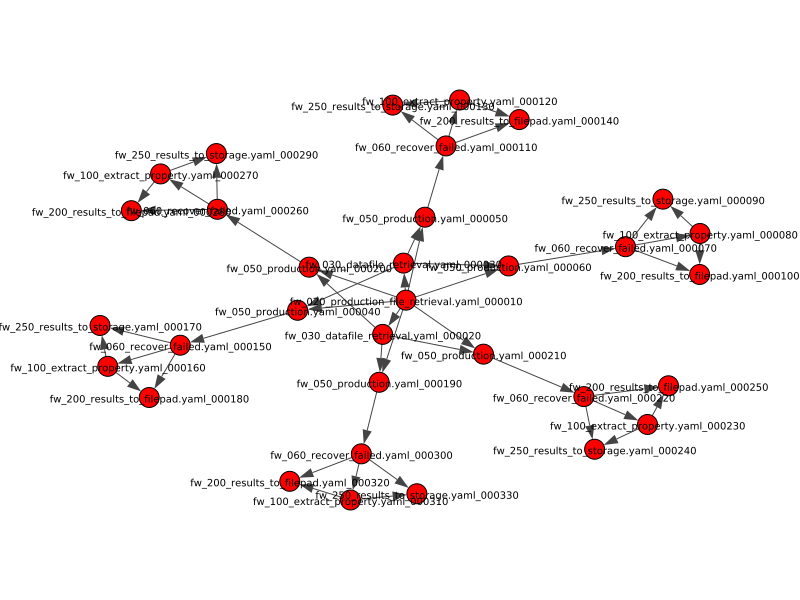

In [21]:
wfb.plot()

## JUWELS EXPRESS TRIALS

In [18]:
prefix= '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production'
wfb = WorkflowBuilder(os.path.join(prefix,'system_express_trial_juwels.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build_express_trial_juwels')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/AFM/AU/25Ang/AU/51x30x21/SDS/production/system_express_trial_juwels.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 7 nodes: ['fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml', 'fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 9 edges: [('fw_020_production_file_retrieval.yaml', 'fw_030_datafile_retrieval.yaml'), ('fw_020_production_file_retrieval.yaml', 'fw_050_production.yaml'), ('fw_030_datafile_retrieval.yaml', 'fw_050_production.yaml'), ('fw_050_production.yaml', 'fw_060_recover_failed.yaml'), ('fw_060_recover_failed.yaml', 'fw_100_extract_property.yaml'), ('fw_060_recover_failed.yaml', 'fw_200_results_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_020_production_file_retrieval.yaml_000010:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_di

INFO:fireworks.utilities.wfb:2: fw_050_production.yaml_000010_000020.
INFO:fireworks.utilities.wfb:Iterating node 2: fw_050_production.yaml_000010_000020
INFO:fireworks.utilities.wfb:2: fw_050_production.yaml_000010_000020, dist. 2, top.pos. 2 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_020_production_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  1: fw_030_datafile_retrieval.yaml_000020, dist. 1, top. pos. 1
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [1]
INFO:fireworks.utilities.wfb:  1: fw_030_datafile_retrieval.yaml_000020, dist. 1, top. pos. 1 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 2*1 = 2
DEBUG:fireworks.utilities.wfb:  Parent name: fw_030_datafile_retrieval.yaml_000020
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 

INFO:fireworks.utilities.wfb:Added vertex 7 - fw_050_production.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 8 - fw_060_recover_failed.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 9 - fw_100_extract_property.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 10 - fw_200_results_to_filepad.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added vertex 11 - fw_250_results_to_storage.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:Added edge 9 - (0-7)
INFO:fireworks.utilities.wfb:Added edge 10 - (1-7)
INFO:fireworks.utilities.wfb:Added edge 11 - (7-8)
INFO:fireworks.utilities.wfb:Added edge 12 - (8-9)
INFO:fireworks.utilities.wfb:Added edge 13 - (8-10)
INFO:fireworks.utilities.wfb:Added edge 14 - (8-11)
INFO:fireworks.utilities.wfb:Added edge 15 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 16 - (9-11)
INFO:fireworks.utilities.wfb:          Instance 7 - 30 - fw_050_production.yaml_000030 of class 2 - fw_050_prod

INFO:fireworks.utilities.wfb:          Instance 12 - 40 - fw_050_production.yaml_000040 of class 2 - fw_050_production.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 1:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 2, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 2: fw_050_production.yaml_000030
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 7, 8, 9, 11, 10, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_050_production.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_060_recover_failed.yaml

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_060_recover_failed.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_100_extract_property.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_200_results_to_filepad.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_250_results_to_storage.yaml_000010_000020_000040_000050
INFO:fireworks.utilities.wfb:Added edge 17 - (7-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (12-13)
INFO:fireworks.utilities.wfb:Added edge 19 - (12-14)
INFO:fireworks.utilities.wfb:Added edge 20 - (12-15)
INFO:fireworks.utilities.wfb:Added edge 21 - (13-14)
INFO:fireworks.utilities.wfb:Added edge 22 - (13-15)
INFO:fireworks.utilities.wfb:          Instance 12 - 50 - fw_060_recover_failed.yaml_000050 of class 8 - fw_060_recover_failed.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persiten

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000060:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 

INFO:fireworks.utilities.wfb:  8: fw_060_recover_failed.yaml_000050, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:  9: fw_100_extract_property.yaml_000060, dist. 4, top. pos. 4
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [9]
INFO:fireworks.utilities.wfb:  9: fw_100_extract_property.yaml_000060, dist. 4, top. pos. 4 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 2
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000060
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_p

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_200_results_to_filepad.yaml_000010_000020_000040_000050_000060_000080
INFO:fireworks.utilities.wfb:Added edge 17 - (8-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (9-12)
INFO:fireworks.utilities.wfb:          Instance 12 - 80 - fw_200_results_to_filepad.yaml_000080 of class 10 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 10, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 10: fw_250_results_to_storage.yaml_000070
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 7, 8, 9, 11, 10, 2, 3, 4, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fi

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_recover_failed.yaml_000090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.

INFO:fireworks.utilities.wfb:6: fw_250_results_to_storage.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_050_production.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_060_recover_failed.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_100_extract_property.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_250_results_to_storage.yaml_000010_000020_000030_000090_000100.
INFO:fireworks.utilities.wfb:Iterating node 11: fw_250_results_to_storage.yaml_000010_000020_000030_000090_000100
INFO:fireworks.utilities.wfb:11: fw_250_results_to_storage.yaml_000010_000020_000030_000090_000100, dist. 5, top.pos. 10 has 2 parents with distances [3, 4]:
INFO:fireworks.utilities.wfb:  8: fw_060_recover_failed.yaml_000090, dist. 3, top. pos. 8
INFO:fireworks.utilities.wfb:  9: fw_100_extract_property.yaml_000100, dist. 4, top. pos. 9
INFO:fireworks.utilities.wfb:    Maximum dis

INFO:fireworks.utilities.wfb:Added vertex 12 - fw_250_results_to_storage.yaml_000010_000020_000030_000090_000100_000110
INFO:fireworks.utilities.wfb:Added edge 17 - (9-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (8-12)
INFO:fireworks.utilities.wfb:          Instance 12 - 110 - fw_250_results_to_storage.yaml_000110 of class 11 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_020_production_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 11, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 11: fw_250_results_to_storage.yaml_000110
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 3, 4, 5, 7, 6, 2, 8, 9, 11, 10]
INFO:fireworks.utilities.wfb:0: fw_020_production_file_retrieval.yaml_000010 has been visited before, move on.
INFO:f

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'JUWELS', 'walltime': '00:15:00', 'queue': 'devel', 'ntasks': 96, 'cpus_per_task': 1, 'ntasks_per_node': 96, 'account': 'hfr13', 'worker': 'juwels_noqueue', 'postp_worker': 'juwels_noqueue', 'restart_worker': 'juwels_queue', 'max_restarts': 1, 'smb_gateway': '132.230.102.164', 'smb_gateway_user': 'sshclient', 'smb_gateway_ssh_id': '~/.ssh/sshclient-frrzvm', 'smb_host': 'ufr2.isi1.public.ads.uni-freiburg.de', 'smb_port': 445, 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'step': 'production', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'coulomb_cutoff_unit': 'Ang', 'skin_distance': 3.0, 'skin_distance_unit': 'Ang', 'mpiio': 1, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'netcdf_frequency': 10, 'thermo_frequency': 10, 'thermo_average_frequency': 10, 'restart_frequency': 1000, 'minimization_

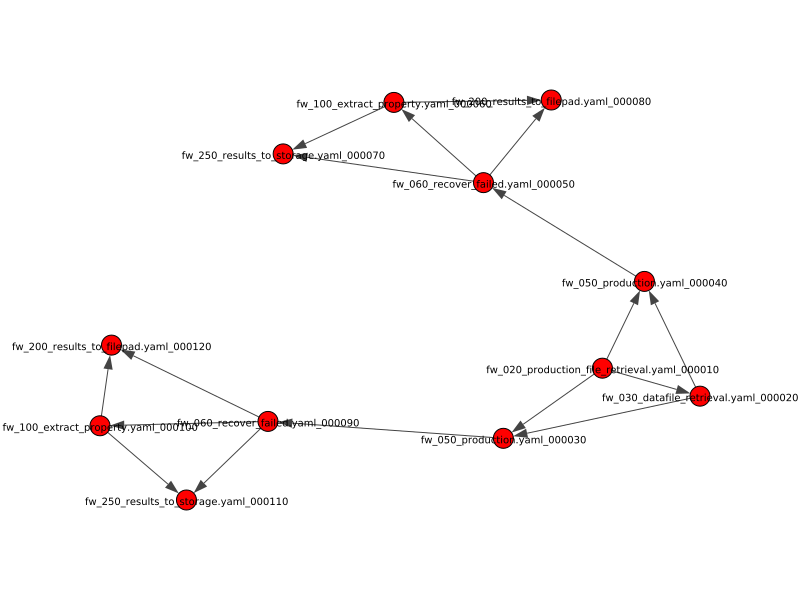

In [19]:
wfb.plot()

## SDS on AU 111 51x30x21, general

In [16]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/equilibration'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise

### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/equilibration/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 11 nodes: ['fw_010_datafile_retrieval.yaml', 'fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml', 'fw_055_equilibration_nvt_file_retrieval.yaml', 'fw_060_equilibration_nvt.yaml', 'fw_065_equilibration_npt_file_retrieval.yaml', 'fw_070_equilibration_npt.yaml', 'fw_100_extract_property.yaml', 'fw_150_results_to_bwcloud.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 16 edges: [('fw_025_minimization_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml'), ('fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_datafile_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_0

INFO:fireworks.utilities.wfb:Added vertex 11 - fw_010_datafile_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_025_minimization_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_030_minimization.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_055_equilibration_nvt_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_060_equilibration_nvt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 16 - fw_065_equilibration_npt_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 17 - fw_070_equilibration_npt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 18 - fw_100_extract_property.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 19 - fw_150_results_to_bwcloud.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 20 - fw_200_results_to_filepad.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 21 - fw_250_results_to_storage.yaml_000010
INFO:fireworks.utilities.wfb:Added edg

INFO:fireworks.utilities.wfb:Added vertex 11 - fw_010_datafile_retrieval.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_030_minimization.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_060_equilibration_nvt.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 16 - fw_070_equilibration_npt.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 17 - fw_100_extract_property.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 18 - fw_150_results_to_bwcloud.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 19 - fw_200_results_to_filepad.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added vertex 20 - fw_250_results_to_storage.yaml_000010_000020
INFO:fireworks.utilities.wfb:Added edge 16 - (1-11)
INFO:firew

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:    Iterating persitent content update 4:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'], 's

INFO:fireworks.utilities.wfb:Added vertex 68 - fw_150_results_to_bwcloud.yaml_000010_000070
INFO:fireworks.utilities.wfb:Added vertex 69 - fw_200_results_to_filepad.yaml_000010_000070
INFO:fireworks.utilities.wfb:Added vertex 70 - fw_250_results_to_storage.yaml_000010_000070
INFO:fireworks.utilities.wfb:Added edge 96 - (1-61)
INFO:fireworks.utilities.wfb:Added edge 97 - (1-62)
INFO:fireworks.utilities.wfb:Added edge 98 - (61-62)
INFO:fireworks.utilities.wfb:Added edge 99 - (61-63)
INFO:fireworks.utilities.wfb:Added edge 100 - (61-65)
INFO:fireworks.utilities.wfb:Added edge 101 - (63-64)
INFO:fireworks.utilities.wfb:Added edge 102 - (65-66)
INFO:fireworks.utilities.wfb:Added edge 103 - (62-64)
INFO:fireworks.utilities.wfb:Added edge 104 - (64-66)
INFO:fireworks.utilities.wfb:Added edge 105 - (66-67)
INFO:fireworks.utilities.wfb:Added edge 106 - (66-68)
INFO:fireworks.utilities.wfb:Added edge 107 - (66-69)
INFO:fireworks.utilities.wfb:Added edge 108 - (66-70)
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 81 - fw_010_datafile_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 82 - fw_030_minimization.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 83 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 84 - fw_060_equilibration_nvt.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 85 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 86 - fw_070_equilibration_npt.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 87 - fw_100_extract_property.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 88 - fw_150_results_to_bwcloud.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 89 - fw_200_results_to_filepad.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 90 - fw_250_results_to_storage.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added edge 128 - (1-81)
INFO:fire

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 10:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 11:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm',

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000130:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_u

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'], 'sb_unit_cell_unit': 'm', 'sb_volume': 3.37e-24, 'sb_volume_unit':

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 190 - fw_100_ext

INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 200 - fw_200_results_to_filepad.yaml_000200 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000200
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 114, 113, 115, 112, 116, 118, 120, 119, 117, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 6

INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 114, 113, 115, 112, 116, 118, 120, 119, 117, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fire

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilit

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilit

INFO:fireworks.utilities.wfb:      Modified graph at node 103, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 103: fw_010_datafile_retrieval.yaml_000130
INFO:fireworks.utilities.wfb:Current topological order: [0, 103, 106, 105, 107, 104, 108, 109, 112, 111, 110, 101, 114, 113, 102, 115, 116, 117, 120, 119, 118, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_030_minimiza

INFO:fireworks.utilities.wfb:Added edge 192 - (0-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (101-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (114-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (113-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 204 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 250 - fw_030_minimization.yaml_000250 of class 102 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000120_000240_000250_000260
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000120_000230_000240_000250_000260
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000120_000230_000240_000250_000260
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000120_000230_000240_000250_000260
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000120_000230_000240_000250_000260_000270
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000120_000230_000240_000250_000260_000270
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260_000270
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000120_000230_000240_000250_000260_000270
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 280 - fw_100_ext

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000290
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 290 - fw_200_results_to_filepad.yaml_000290 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000300
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 300 - fw_150_results_to_bwcloud.yaml_000300 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000310
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 310 - fw_250_results_to_storage.yaml_000310 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_000280
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 117, 120, 119, 118, 91, 95, 93, 92, 94

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added edge 192 - (91-126)
INFO:fireworks.utilities.wfb:Added edge 193 - (126-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (94-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (121-125)

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000110:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_

INFO:fireworks.utilities.wfb:119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340
INFO:fireworks.utilities.wfb:119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340, dist. 3, top.pos. 9 has 2 parents with distances [2, 2]:
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000330, dist. 2, top. pos. 3
INFO:fireworks.utilities.wfb:  120: fw_030_minimization.yaml_000340, dist. 2, top. pos. 8
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 120]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000330, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000330
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 

INFO:fireworks.utilities.wfb:93: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: f

INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (120-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 360 - fw_070_equilibration_npt.yaml_000360 of class 115 - 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000370:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000370
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_th

INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_250_results_to_storage.yaml_000010_000110_000320_000330_000340_000350_000360_000370.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_250_results_to_storage.yaml_000010_000110_000320_000330_0003

INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:Added edge 192 - (81-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (84-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 410 - fw_065_equilibration_npt_file_retrieval.yaml_000410 of class 85 - fw_065_equilibration_npt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000100
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_

INFO:fireworks.utilities.wfb:83: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: f

INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000100_000420_000430_000440
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000100_000410_000420_000430_000440
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000100_000410_000420_000430_000440
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000100_000410_000420_000430_000440
INFO:fireworks.utilities.wfb:Added edge 192 - (113-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (121-125)
INFO:firework

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000440:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area'

INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:84: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_2

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000100_000410_000420_000430_000440_000450_000460_000470
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 470 - fw_200_results_to_filepad.yaml_000470 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000470
INFO:fireworks.utilities.wfb:Current topological order: [0, 84, 87, 86, 88, 85, 89, 90, 93, 92, 91, 83, 96, 95, 97, 94, 98, 99, 102, 101, 100, 82, 105, 104, 106, 103, 107, 108,

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000460:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_065_equilibration_npt_file_retrieval.yaml_000010_000090.
INFO:fireworks.utilities.wfb:Iterating node 75: fw_065_equilibration_npt_file_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:75: fw_065_equilibration_npt_file_retrieval.yaml_000010_000090, dist. 2, top.pos. 44 has 1 parents with distances [1]:
INFO:fireworks.utili

INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:90

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000090_000510
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000090_000510
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000090_000500_000510
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000090_000500_000510
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000090_000500_000510
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000090_000500_000510
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000090_000500_000510
INFO:fireworks.utilities.wfb:Added edge 192 - (71-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (72-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Adde

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_

INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equili

INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 530 - fw_060_equilibration_nvt.yaml_000530 of class 115 - fw_060_equilibration_nvt.yaml 

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000530:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area'

INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_250_results_to_storage.yaml_000010_000090_000500_000510_000520_000530_000540_000550
INFO:fireworks.utilities.wfb:Current topological order: [0, 75, 78, 77, 79, 76, 80, 81, 84, 83, 82, 74, 87, 86, 88, 85, 89, 90, 93, 92, 91, 73, 96, 95, 97, 94, 98, 99, 102, 101, 100, 72, 105, 104, 106, 103, 107, 108, 111, 110, 109, 71, 114, 113, 115, 112, 116, 118, 120, 119, 117, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000550:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_eq

INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:87

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:61: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_065_equilibration_npt_file_retrieval.yaml_000010_000080.
INFO:fireworks.utilities.wfb:Iterating node 65: fw_065_equilibration_npt_file_retrieval.yaml_000010_000080
INFO:fireworks.utilities.wfb:65: fw_065_equilibration_npt_file_retrieval.yaml_000010_000080, dist. 2, top.pos. 54 has 1 parents with distances [1]:
INFO:fireworks.utilities.wfb:  61: fw_010_datafile_retrieval.yaml_000080, dist. 1, top. pos. 51
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [61]
INFO:fireworks.utilities.wfb:  61: fw_010_datafile_retrieval.yaml_000080, dist. 1, top. pos. 51 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000080
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': 

INFO:fireworks.utilities.wfb:75: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:101: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 62, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 62: fw_010_datafile_retrieval.yaml_000090
INFO:fireworks.utilities.wfb:Current topological order: [0, 66, 69, 68, 70, 67, 71, 72, 75, 74, 73, 65, 78, 77, 79, 76, 80, 81, 84, 83, 82, 64, 87, 86, 88, 85, 89, 90, 93, 92, 91, 63, 96, 95, 97, 94, 98, 99, 102, 101, 100, 62, 105, 104, 106, 103, 107, 108, 111, 110, 109, 61, 120, 113, 114, 112, 115, 116, 119, 118, 117, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: f

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000600:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30

INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630, dist. 5, top.pos. 7 has 1 parents with distances [4]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [116]
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_070_equilibration_npt.yaml_000630
DEBUG:fireworks.utilities.wfb:  Parent context

INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:61: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610_000620_000630_000640.
INFO:firework

INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_

DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'], 'sb_unit_cell_unit': 'm', 'sb_volume': 3.37e-24, 'sb_volume_unit': 'm^3',

INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 194 - (54-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 680 - fw_065_equilibration_npt_file_retrieval.yaml_000680 of class 55 - fw_065_equilibration_npt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 55, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 

INFO:fireworks.utilities.wfb:115: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_055_equilibration_nvt_file_retrieval.yaml_000010_000070.
INFO:fireworks.utilities.wfb:Iterating node 53: fw_055_equilibration_nvt_file_retrieval.yaml_000010_000070
INFO:fireworks.utilities.wfb:53: fw_055_equilibration_nvt_file_retrieval.yaml_000010_000070, dist. 2, top.pos. 107 has 1 parents with distances [1]:
INFO:fireworks.utilities.wfb:  51: fw_010_datafile_retrieval.yaml_000070, dist. 1, top. pos. 55
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [51]
INFO:fireworks.utilities.wfb:  51: fw_010_datafile_retrieval.yaml_000070, dist. 1, top. pos. 55 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000070
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 

INFO:fireworks.utilities.wfb:59: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000070:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_

INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e

INFO:fireworks.utilities.wfb:53: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: f

INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000070_000680_000690_000700_000710_000720
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000070_000680_000690_000700_000710_000720
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 720 - fw_070_equilibration_npt.yaml_000720 of class 115 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.u

INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000070_000680_000690_000700_000710_000720.
INFO:fireworks.utili

INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_0

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000730:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730_000750
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 750 - fw_150_results_to_bwcloud.yaml_000750 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000740
INFO:fireworks.utilities.wfb:Current topological order: [0, 57, 60, 59, 61, 58, 62, 63, 66, 65, 64, 56, 69, 68, 70, 67, 71, 72, 75, 74, 73, 55, 78, 77, 79, 76, 80, 81, 84, 83, 

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_250_results_to_storage.yaml_000010_000070_000680_000690_000700_000710_000720_000730.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_250_results_to_storage.yaml_000010_000070_000680_000690_000700_000710_000720_000730
INFO:fireworks.utilities.wfb:117: fw_250_results_to_storage.yaml_000010_000070_000680_000690_000

INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_1

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000060:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plan

INFO:fireworks.utilities.wfb:78: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:83: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_1

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_030_minimization.yaml_000010_000060_000790
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000060_000780_000790
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000060_000770_000780_000790
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000060_000770_000780_000790
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000060_000770_000780_000790
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000060_000770_000780_000790
INFO:fireworks.utilities.wfb:Added edge 192 - (0-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (41-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (114-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:firewor

INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000060_000770_000780_000790_000800
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000060_000770_000780_000790_000800
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilit

INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 810 - fw_070_equilibration_npt.yaml_000810 of class 116 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 116, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 116: fw_070_equilibration_npt.yaml_000810
INFO:fireworks.utilities.wfb:Current topological order: [0, 48, 51, 50, 52, 49, 53, 54, 57, 56, 55, 47, 60, 59, 61, 58, 62, 63, 66, 65, 64, 46, 69, 68, 70, 67, 71, 72, 75, 74, 73, 45, 78, 77, 79, 76, 80, 81, 8

INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820.
INFO:fireworks.utilities.wfb:Iterating node 120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820, dist. 6, top.pos. 8 has 2 parents with distances [4, 5]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000810, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBU

INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000820:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:43: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: f

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000050_000860
INFO:fireworks.utilities.wfb:Added edge 192 - (31-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (34-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)

INFO:fireworks.utilities.wfb:88: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw

INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000050_000860_000870
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000050_000860_000870
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000050_000860_000870
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000050_000860_000870
INFO:fireworks.utilities.wfb:Added edge 192 - (31-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (32-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-126)
INFO:fireworks.utiliti

INFO:fireworks.utilities.wfb:86: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_030_minimization.yaml_000010_000050_000880
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000050_000870_000880
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000050_000860_000870_000880
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000050_000860_000870_000880
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000050_000860_000870_000880
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870_000880
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000050_000860_000870_000880
INFO:fireworks.utilities.wfb:Added edge 192 - (0-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (31-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (114-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:firewor

INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:96

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000050_000870_000880_000890
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000050_000860_000870_000880_000890
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000050_000860_000870_000880_000890
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000050_000860_000870_000880_000890
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870_000880_000890
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000050_000860_000870_000880_000890
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000050_000860_000870_000880_000890_000900
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000050_000860_000870_000880_000890_000900
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000050_000860_000870_000880_000890_000900
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870_000880_000890_000900
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000050_000860_000870_000880_000890_000900
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000050_000860_000870_000880_000890_000900_000910
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000050_000860_000870_000880_000890_000900_000910
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000050_000860_000870_000880_000890_000900_000910
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870_000880_000890_000900_000910
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 910 - fw_100_ext

INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000050_000860_000870_000880_000890_000900_000910_000920
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 920 - fw_200_results_to_filepad.yaml_000920 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000920
INFO:fireworks.utilities.wfb:Current topological order: [0, 39, 42, 41, 43, 40, 44, 45, 48, 47, 46, 38, 51, 50, 52, 49, 53, 54, 57, 56, 55, 37, 60, 59, 61, 58, 62, 63, 66, 65, 

INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equili

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000920
INFO:fireworks.utilities.wfb:Current topological order: [0, 39, 42, 41, 43, 40, 44, 45, 48, 47, 46, 38, 51, 50, 52, 49, 53, 54, 57, 56, 55, 37, 60, 59, 61, 58, 62, 63, 66, 65, 64, 36, 69, 68, 70, 67, 71, 72, 75, 74, 73, 35, 78, 77, 79, 76, 80, 81, 84, 83, 82, 34, 87, 86, 88, 85, 89, 90, 93, 92, 91, 33, 96, 95, 97, 94, 98, 99, 102, 101, 100, 32, 105, 104, 106, 103, 107, 108, 111, 110, 109, 31, 114, 113, 115, 112, 116, 118, 120, 119, 117, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0:

INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_000910
INFO:fireworks.utilities.wfb:Current topological order: [0, 39, 42, 41, 43, 40, 44, 45, 48, 47, 46, 38, 51, 50, 52, 49, 53, 54, 57, 56, 55, 37, 60, 59, 61, 58, 62, 63, 66, 65, 64, 36, 69, 68, 70, 67, 71, 72, 75, 74, 73, 35, 78, 77, 79, 76, 80, 81, 84, 83, 82, 34, 87, 86, 88, 85, 89, 90, 93, 92, 91, 33, 96, 95, 97, 94, 98, 99, 102, 101, 100, 32, 105, 104, 106, 103, 107, 108, 111, 110, 109, 31, 114, 113, 115, 112, 116, 117, 120, 119, 118, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_030_minimization

INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 950 - fw_065_equilibration_npt_file_retrieval.yaml_000950 of class 25 - fw_065_equilibration_npt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 25, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 25: fw_010_datafile_retrieval.yaml_000050
INFO:fireworks.utilities.wfb:Current topological order: [0, 33, 36, 3

INFO:fireworks.utilities.wfb:89: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:99

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000040_000950_000960
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000040_000950_000960
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000040_000950_000960
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000040_000960
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_060_equilibration_nvt.yaml_000010_000040_000960
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000040_000950_000960
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000040_000950_000960
INFO:fireworks.utilities.wfb:Added edge 192 - (21-124)
INFO:fireworks.utilities.wfb:Added edge 193 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 194 - (22-125)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-121)
INFO:fireworks.utilities.wfb:Adde

INFO:fireworks.utilities.wfb:78: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:88

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e

INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_1

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000960:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30

INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibrati

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_equilibration_nvt.yaml_000980
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_t

INFO:fireworks.utilities.wfb:43: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:40: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibrati

INFO:fireworks.utilities.wfb:21: fw_010_datafile_retrieval.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000970 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000960 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000980 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000950 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000990 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000040_000950_000960_000970_000980_000990.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_100_extract_property.yaml_000010_000040_000950_000960_000970_000980_000990
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000040_000950_000960_000970_000980_

INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_055_equilibrati

INFO:fireworks.utilities.wfb:22: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000930 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_001010
INFO:fireworks.utilities.wfb:Current topological order: [0, 30, 33, 32, 34, 31, 35, 36, 39, 38, 37, 29, 42, 41, 43, 40, 44, 45, 48, 47, 46, 28, 51, 50, 52, 49, 53, 54, 57, 56, 55, 27, 60, 59, 61, 58, 62, 63, 66, 65, 64, 26, 69, 68, 70, 67, 71, 72, 75, 74, 73, 25, 78, 77, 79, 76, 80, 81, 84, 83, 82, 24, 87, 86, 88, 85, 89, 90, 93, 92, 91, 23, 96, 95, 97, 94, 98, 99, 102, 101, 100, 22, 105, 104, 106, 103, 107, 108, 111, 110, 109, 21, 114, 113, 115, 112, 116, 118, 120, 119, 117, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimizati

INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000040_000950_000960_000970_000980_000990_001000_001030
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1030 - fw_250_results_to_storage.yaml_001030 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_001000
INFO:fireworks.utilities.wfb:Current topological order: [0, 30, 33, 32, 34, 31, 35, 36, 39, 38, 37, 29, 42, 41, 43, 40, 44, 45, 48, 47, 46, 28, 51, 50, 52, 49, 53, 54, 57, 56, 5

INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000030_001040
INFO:fireworks.utilities.wfb:Added edge 192 - (11-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (14-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)

INFO:fireworks.utilities.wfb:70: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:56: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_1

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000030:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_

INFO:fireworks.utilities.wfb:43: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:40: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibrati

INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000010_000030_001050_001060.
INFO:fireworks.utilities.wfb:Iterating node 115: fw_060_equilibration_nvt.yaml_000010_000030_001050_001060
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000010_000030_001050_001060, dist. 3, top.pos. 4 has 2 parents with distances [2, 2]:
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_001050, dist. 2, top. pos. 3
INFO:fireworks.utilities.wfb:  114: fw_030_minimization.yaml_001060, dist. 2, top. pos. 2
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 114]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibra

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'],

INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_001090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibrati

INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_001080, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_001090, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_001090, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_001090
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0,

INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:40: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_1

INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_001000 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_001030 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:33

INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000020_001130
INFO:fireworks.utilities.wfb:Added edge 192 - (1-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (4-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
I

INFO:fireworks.utilities.wfb:65: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_065_equilibratio

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000020:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_u

INFO:fireworks.utilities.wfb:36: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:40: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_065_equilibrati

INFO:fireworks.utilities.wfb:105: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_001090 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_001120 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_001110 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_001100 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_010_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities

INFO:fireworks.utilities.wfb:      Modified graph at node 2, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 2: fw_010_datafile_retrieval.yaml_000030
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 37, 9, 42, 41, 43, 40, 44, 45, 48, 47, 46, 8, 51, 50, 52, 49, 53, 54, 57, 56, 55, 7, 60, 59, 61, 58, 62, 63, 66, 65, 64, 6, 69, 68, 70, 67, 71, 72, 75, 74, 73, 5, 78, 77, 79, 76, 80, 81, 84, 83, 82, 4, 87, 86, 88, 85, 89, 90, 93, 92, 91, 3, 96, 95, 97, 94, 98, 99, 102, 101, 100, 2, 105, 104, 106, 103, 107, 108, 111, 110, 109, 1, 114, 113, 115, 112, 116, 117, 120, 119, 118]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_030_minimization.y

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_15

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e

INFO:fireworks.utilities.wfb:8: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_20

INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000010_000020_001130_001140_001150_001160, dist. 4, top.pos. 116 has 2 parents with distances [2, 3]:
INFO:fireworks.utilities.wfb:  112: fw_065_equilibration_npt_file_retrieval.yaml_001130, dist. 2, top. pos. 114
INFO:fireworks.utilities.wfb:  115: fw_060_equilibration_nvt.yaml_001160, dist. 3, top. pos. 112
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [115]
INFO:fireworks.utilities.wfb:  115: fw_060_equilibration_nvt.yaml_001160, dist. 3, top. pos. 112 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_equilibration_nvt.yaml_001160
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_f

INFO:fireworks.utilities.wfb:20: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_2

INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000930 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000920 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_010_datafile_retrieval.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000970 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000960 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000980 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibratio

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 1180 - fw_100_ex

INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:6: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_0

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_001180:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '12:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/AU/111/51x30x21', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane'

INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:8: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_0

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_001160 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_001130 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_001170 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_001180 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_001190 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140_001150_001160_001170_001180.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140_001150_001160_001170_001180, dist. 6, top.pos. 119 has 2 parents with distances [4, 5]:
INFO:fireworks.utilit

INFO:fireworks.utilities.wfb:19: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_1

INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000930 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000920 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_010_datafile_retrieval.yaml_000040 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000970 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000960 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000980 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000950 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180_001210
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1210 - fw_250_results_to_storage.yaml_001210 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_001180
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 3

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibratio

INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000020'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000030'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000040'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000050'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000060'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000070'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000080'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000090'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000100'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000110'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000120'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_0

INFO:fireworks.utilities.wfb:Loading files 'fw_150_results_to_bwcloud.yaml_001110'.
INFO:fireworks.utilities.wfb:Loading files 'fw_150_results_to_bwcloud.yaml_001200'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000200'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000290'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000380'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000470'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000560'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000650'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000740'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000830'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000920'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_0

INFO:fireworks.utilities.wfb:fw_id -740: fw_100_extract_property.yaml_000190
INFO:fireworks.utilities.wfb:fw_id -750: fw_100_extract_property.yaml_000280
INFO:fireworks.utilities.wfb:fw_id -760: fw_100_extract_property.yaml_000370
INFO:fireworks.utilities.wfb:fw_id -770: fw_100_extract_property.yaml_000460
INFO:fireworks.utilities.wfb:fw_id -780: fw_100_extract_property.yaml_000550
INFO:fireworks.utilities.wfb:fw_id -790: fw_100_extract_property.yaml_000640
INFO:fireworks.utilities.wfb:fw_id -800: fw_100_extract_property.yaml_000730
INFO:fireworks.utilities.wfb:fw_id -810: fw_100_extract_property.yaml_000820
INFO:fireworks.utilities.wfb:fw_id -820: fw_100_extract_property.yaml_000910
INFO:fireworks.utilities.wfb:fw_id -830: fw_100_extract_property.yaml_001000
INFO:fireworks.utilities.wfb:fw_id -840: fw_100_extract_property.yaml_001090
INFO:fireworks.utilities.wfb:fw_id -850: fw_100_extract_property.yaml_001180
INFO:fireworks.utilities.wfb:fw_id -860: fw_150_results_to_bwcloud.yaml_0002

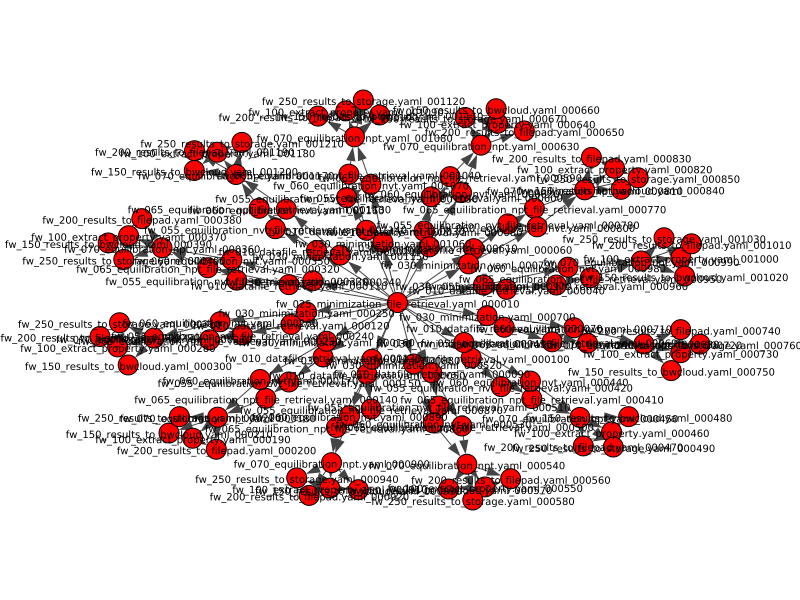

In [17]:
wfb.plot()

## 646 SDS on AU 111 51x30x21, hemicylinders

In [7]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/646/AU/111/52x30x21/hemicylinders'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise

### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/646/AU/111/52x30x21/hemicylinders/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 8 nodes: ['fw_010_file_retrieval.yaml', 'fw_030_minimization.yaml', 'fw_060_equilibration_nvt.yaml', 'fw_070_equilibration_npt.yaml', 'fw_100_extract_property.yaml', 'fw_150_results_to_bwcloud.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 12 edges: [('fw_010_file_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_file_retrieval.yaml', 'fw_060_equilibration_nvt.yaml'), ('fw_010_file_retrieval.yaml', 'fw_070_equilibration_npt.yaml'), ('fw_030_minimization.yaml', 'fw_060_equilibration_nvt.yaml'), ('fw_060_equilibration_nvt.yaml', 'fw_070_equilibration_npt.yaml'), ('fw_070_equilibration_npt.yaml', 'fw_100

INFO:fireworks.utilities.wfb:Added vertex 9 - fw_030_minimization.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 10 - fw_060_equilibration_nvt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 11 - fw_070_equilibration_npt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_100_extract_property.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_150_results_to_bwcloud.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_200_results_to_filepad.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_250_results_to_storage.yaml_000010
INFO:fireworks.utilities.wfb:Added edge 12 - (8-9)
INFO:fireworks.utilities.wfb:Added edge 13 - (8-10)
INFO:fireworks.utilities.wfb:Added edge 14 - (8-11)
INFO:fireworks.utilities.wfb:Added edge 15 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 16 - (10-11)
INFO:fireworks.utilities.wfb:Added edge 17 - (11-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (11-13)
INFO:fireworks.utilities.wfb:Added edge 19 - (11-1

INFO:fireworks.utilities.wfb:Added edge 16 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 17 - (10-11)
INFO:fireworks.utilities.wfb:Added edge 18 - (10-12)
INFO:fireworks.utilities.wfb:Added edge 19 - (10-13)
INFO:fireworks.utilities.wfb:Added edge 20 - (10-14)
INFO:fireworks.utilities.wfb:Added edge 21 - (11-12)
INFO:fireworks.utilities.wfb:Added edge 22 - (11-13)
INFO:fireworks.utilities.wfb:Added edge 23 - (11-14)
INFO:fireworks.utilities.wfb:          Instance 8 - 20 - fw_030_minimization.yaml_000020 of class 1 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 1, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 1: fw_030_minimization.yaml_000020
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 7, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_010_file_re

INFO:fireworks.utilities.wfb:      Modified graph at node 2, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 2: fw_060_equilibration_nvt.yaml_000030
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 7, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_minimization.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_060_equilibration_nvt.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_070_equilibration_npt.yaml_000010_000020_000030.
INFO:fireworks.utilities.wfb:Iterating node 3: fw_070_equilibration_npt.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:3: fw_070_equilibration_npt.yaml_000010_000020_000030, dist. 3, top.pos. 3 has 2 parents with distances [0, 2]:
INFO:fireworks.utilities.wfb:  0: fw_010_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb: 

INFO:fireworks.utilities.wfb:Iterating node 4: fw_100_extract_property.yaml_000010_000020_000030_000040
INFO:fireworks.utilities.wfb:4: fw_100_extract_property.yaml_000010_000020_000030_000040, dist. 4, top.pos. 4 has 1 parents with distances [3]:
INFO:fireworks.utilities.wfb:  3: fw_070_equilibration_npt.yaml_000040, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [3]
INFO:fireworks.utilities.wfb:  3: fw_070_equilibration_npt.yaml_000040, dist. 3, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: fw_070_equilibration_npt.yaml_000040
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/hemicylinders', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testus

DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/hemicylinders', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/hemicylinders/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_hemicylinders', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000050:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/hemicylinders', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/hemicylinders/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_hemicylinders

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/hemicylinders', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/hemicylinders/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_hemicylinders', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e

In [95]:
print(undefined_variables_output)

╒════════════════════════════════╤══════════════════╤═════╤════════════╤════════════════╤══════════╤═════════════╤═════════╤═════════════╤════════════╤══════════════════╤═══════╤═══════╤════════════════╤═════════╤═══════════════╤═══════╤════════════════╤════════════╤════════════╤═══════════════╤═════════════╤══════════╤═════════╤═════════════╤════════╤═══════════╤═════════╤═════════════════╤════════════╤══════════════════╤═══════════╤═════════════════════╤════════════════╤═══════════════╤══════════════╤═════════════╤═════════════════╤════════════════╕
│                                │ coeff_identifier │ ppn │ identifier │ ewald_accuracy │ pressure │ neigh_every │ machine │ neigh_check │ sv_density │ sb_crystal_plane │ title │ queue │ sv_preassembly │ ssh_key │ sf_nmolecules │ nodes │ coulomb_cutoff │ surfactant │ remote_dir │ skin_distance │ temperature │ walltime │ sb_name │ neigh_delay │ worker │ remote_ip │ solvent │ file_identifier │ counterion │ temperature_unit │ substrate │ dat

In [103]:
print(show_attributes_output)

-  -------------------------------------  ------------------------------  -----  ----  ----------  -----
   name                                   template                        order  dist  degeneracy  fw_id
0  fw_010_file_retrieval.yaml_000010      fw_010_file_retrieval.yaml      0      0     1           10
1  fw_030_minimization.yaml_000020        fw_030_minimization.yaml        1      1     1           20
2  fw_060_equilibration_nvt.yaml_000030   fw_060_equilibration_nvt.yaml   2      2     1           30
3  fw_070_equilibration_npt.yaml_000040   fw_070_equilibration_npt.yaml   3      3     1           40
4  fw_100_extract_property.yaml_000050    fw_100_extract_property.yaml    4      4     1           50
5  fw_250_results_to_storage.yaml_000060  fw_250_results_to_storage.yaml  7      5     1           60
6  fw_200_results_to_filepad.yaml_000070  fw_200_results_to_filepad.yaml  6      5     1           70
7  fw_150_results_to_bwcloud.yaml_000080  fw_150_results_to_bwcloud.yaml  5 

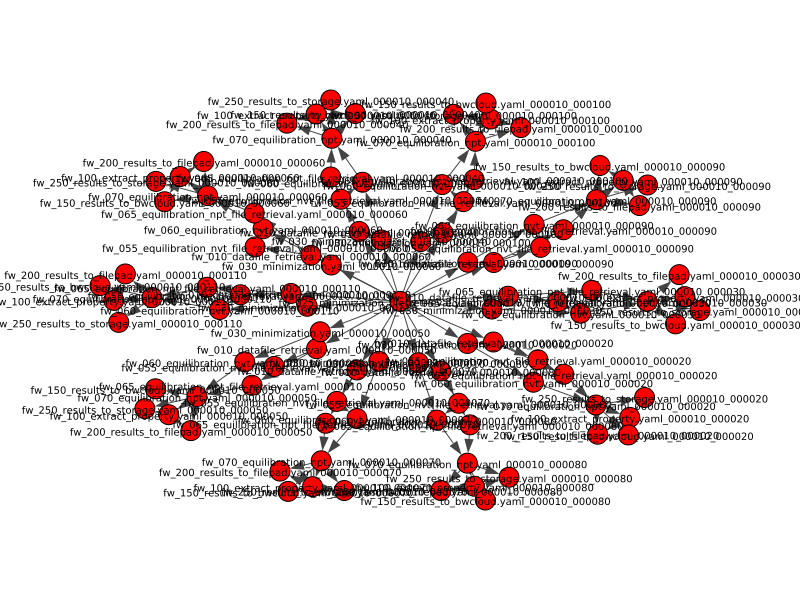

In [30]:
wfb.plot()

## 646 SDS on AU 111 51x30x21, monolayer

In [31]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/646/AU/111/52x30x21/monolayer'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise

### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/646/AU/111/52x30x21/monolayer/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 8 nodes: ['fw_010_file_retrieval.yaml', 'fw_030_minimization.yaml', 'fw_060_equilibration_nvt.yaml', 'fw_070_equilibration_npt.yaml', 'fw_100_extract_property.yaml', 'fw_150_results_to_bwcloud.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 12 edges: [('fw_010_file_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_file_retrieval.yaml', 'fw_060_equilibration_nvt.yaml'), ('fw_010_file_retrieval.yaml', 'fw_070_equilibration_npt.yaml'), ('fw_030_minimization.yaml', 'fw_060_equilibration_nvt.yaml'), ('fw_060_equilibration_nvt.yaml', 'fw_070_equilibration_npt.yaml'), ('fw_070_equilibration_npt.yaml', 'fw_100_ext

INFO:fireworks.utilities.wfb:Added vertex 10 - fw_060_equilibration_nvt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 11 - fw_070_equilibration_npt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_100_extract_property.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_150_results_to_bwcloud.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_200_results_to_filepad.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_250_results_to_storage.yaml_000010
INFO:fireworks.utilities.wfb:Added edge 12 - (8-9)
INFO:fireworks.utilities.wfb:Added edge 13 - (8-10)
INFO:fireworks.utilities.wfb:Added edge 14 - (8-11)
INFO:fireworks.utilities.wfb:Added edge 15 - (9-10)
INFO:fireworks.utilities.wfb:Added edge 16 - (10-11)
INFO:fireworks.utilities.wfb:Added edge 17 - (11-12)
INFO:fireworks.utilities.wfb:Added edge 18 - (11-13)
INFO:fireworks.utilities.wfb:Added edge 19 - (11-14)
INFO:fireworks.utilities.wfb:Added edge 20 - (11-15)
INFO:fireworks.utiliti

INFO:fireworks.utilities.wfb:Added edge 18 - (10-12)
INFO:fireworks.utilities.wfb:Added edge 19 - (10-13)
INFO:fireworks.utilities.wfb:Added edge 20 - (10-14)
INFO:fireworks.utilities.wfb:Added edge 21 - (11-12)
INFO:fireworks.utilities.wfb:Added edge 22 - (11-13)
INFO:fireworks.utilities.wfb:Added edge 23 - (11-14)
INFO:fireworks.utilities.wfb:          Instance 8 - 20 - fw_030_minimization.yaml_000020 of class 1 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 1, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 1: fw_030_minimization.yaml_000020
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 7, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_minimization

INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 7, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_minimization.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_060_equilibration_nvt.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:3: fw_070_equilibration_npt.yaml_000010_000020_000030.
INFO:fireworks.utilities.wfb:Iterating node 3: fw_070_equilibration_npt.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:3: fw_070_equilibration_npt.yaml_000010_000020_000030, dist. 3, top.pos. 3 has 2 parents with distances [0, 2]:
INFO:fireworks.utilities.wfb:  0: fw_010_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  2: fw_060_equilibration_nvt.yaml_000030, dist. 2, top. pos. 2
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [2]
INFO:fireworks.utilities.wfb:  2: fw_060_equil

INFO:fireworks.utilities.wfb:  3: fw_070_equilibration_npt.yaml_000040, dist. 3, top. pos. 3
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [3]
INFO:fireworks.utilities.wfb:  3: fw_070_equilibration_npt.yaml_000040, dist. 3, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: fw_070_equilibration_npt.yaml_000040
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/monolayer/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance':

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000050:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/monolayer/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/52x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/52x30x21/monolayer/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_me

INFO:fireworks.utilities.wfb:Added vertex 8 - fw_150_results_to_bwcloud.yaml_000010_000020_000030_000040_000050_000080
INFO:fireworks.utilities.wfb:Added edge 12 - (3-8)
INFO:fireworks.utilities.wfb:Added edge 13 - (4-8)
INFO:fireworks.utilities.wfb:          Instance 8 - 80 - fw_150_results_to_bwcloud.yaml_000080 of class 5 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:      Modified graph at node 5, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 5: fw_250_results_to_storage.yaml_000060
INFO:fireworks.utilities.wfb:Current topological order: [0, 1, 2, 3, 4, 7, 6, 5]
INFO:fireworks.utilities.wfb:0: fw_010_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:1: fw_030_minimization.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: 

## 646 SDS on AU 111 51x30x21, general

In [32]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise

### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 11 nodes: ['fw_010_datafile_retrieval.yaml', 'fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml', 'fw_055_equilibration_nvt_file_retrieval.yaml', 'fw_060_equilibration_nvt.yaml', 'fw_065_equilibration_npt_file_retrieval.yaml', 'fw_070_equilibration_npt.yaml', 'fw_100_extract_property.yaml', 'fw_150_results_to_bwcloud.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 16 edges: [('fw_025_minimization_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml'), ('fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_datafile_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_datafile_re

INFO:fireworks.utilities.wfb:Added vertex 11 - fw_010_datafile_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 12 - fw_025_minimization_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 13 - fw_030_minimization.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 14 - fw_055_equilibration_nvt_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 15 - fw_060_equilibration_nvt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 16 - fw_065_equilibration_npt_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 17 - fw_070_equilibration_npt.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 18 - fw_100_extract_property.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 19 - fw_150_results_to_bwcloud.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 20 - fw_200_results_to_filepad.yaml_000010
INFO:fireworks.utilities.wfb:Added vertex 21 - fw_250_results_to_storage.yaml_000010
INFO:fireworks.utilities.wfb:Added edg

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measure

INFO:fireworks.utilities.wfb:Added edge 44 - (26-30)
INFO:fireworks.utilities.wfb:Added edge 45 - (27-28)
INFO:fireworks.utilities.wfb:Added edge 46 - (27-29)
INFO:fireworks.utilities.wfb:Added edge 47 - (27-30)
INFO:fireworks.utilities.wfb:          Instance 21 - 30 - fw_010_datafile_retrieval.yaml_000030 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 1:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 2:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 

INFO:fireworks.utilities.wfb:Added vertex 41 - fw_010_datafile_retrieval.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 42 - fw_030_minimization.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 43 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 44 - fw_060_equilibration_nvt.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 45 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 46 - fw_070_equilibration_npt.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 47 - fw_100_extract_property.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 48 - fw_150_results_to_bwcloud.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 49 - fw_200_results_to_filepad.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added vertex 50 - fw_250_results_to_storage.yaml_000010_000050
INFO:fireworks.utilities.wfb:Added edge 64 - (1-41)
INFO:firew

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:Added edge 123 - (76-79)
INFO:fireworks.utilities.wfb:Added edge 124 - (76-80)
INFO:fireworks.utilities.wfb:Added edge 125 - (77-78)
INFO:fireworks.utilities.wfb:Added edge 126 - (77-79)
INFO:fireworks.utilities.wfb:Added edge 127 - (77-80)
INFO:fireworks.utilities.wfb:          Instance 71 - 80 - fw_010_datafile_retrieval.yaml_000080 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 6:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 7:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS

INFO:fireworks.utilities.wfb:Added vertex 91 - fw_010_datafile_retrieval.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 92 - fw_030_minimization.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 93 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 94 - fw_060_equilibration_nvt.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 95 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 96 - fw_070_equilibration_npt.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 97 - fw_100_extract_property.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 98 - fw_150_results_to_bwcloud.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 99 - fw_200_results_to_filepad.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added vertex 100 - fw_250_results_to_storage.yaml_000010_000100
INFO:fireworks.utilities.wfb:Added edge 144 - (1-91)
INFO:fir

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:Added edge 202 - (126-128)
INFO:fireworks.utilities.wfb:Added edge 203 - (126-129)
INFO:fireworks.utilities.wfb:Added edge 204 - (126-130)
INFO:fireworks.utilities.wfb:Added edge 205 - (127-128)
INFO:fireworks.utilities.wfb:Added edge 206 - (127-129)
INFO:fireworks.utilities.wfb:Added edge 207 - (127-130)
INFO:fireworks.utilities.wfb:          Instance 121 - 130 - fw_010_datafile_retrieval.yaml_000130 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 11:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 0, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 0: fw_025_minimization_file_retrieval.yaml_000010
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 115, 113, 112, 114, 116, 

INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 140 - fw_065_equilibration_npt_file_retrieval.yaml_000140 of class 115 - fw_065_equilibration_npt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 115, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 115: fw_065_equilibration_npt_file_retrieval.yaml_000140
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 115, 113, 112, 114, 116, 117, 120, 119, 118, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84,

INFO:fireworks.utilities.wfb:Added edge 197 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 201 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 150 - fw_055_equilibration_nvt_file_retrieval.yaml_000150 of class 113 - fw_055_equilibration_nvt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 113, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 113: fw_065_equilibration_npt_file_retrieval.yaml_000

INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000130_000140_000150_000160
INFO:fireworks.utilities.wfb:Added edge 192 - (0-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (111-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (114-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (113-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 204 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 160 - fw_030_minimization.yaml_000160 of class 112 - fw_030_minimization.yaml created.
INFO:fireworks.util

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000130_000150_000160_000170
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000130_000140_000150_000160_000170
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000130_000140_000150_000160_000170
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000130_000140_000150_000160_000170
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000130_000140_000150_000160_000170
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000130_000140_000150_000160_000170
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000130_000140_000150_000160_000170_000180
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000130_000140_000150_000160_000170_000180
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000130_000140_000150_000160_000170_000180
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000130_000140_000150_000160_000170_000180
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000130_000140_000150_000160_000170_000180
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000130_000140_000150_000160_000170_000180_000190
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 190 - fw_100_ext

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000130_000140_000150_000160_000170_000180_000190_000200
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 200 - fw_200_results_to_filepad.yaml_000200 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000200
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 114, 113, 115, 112, 116, 118, 120, 119, 117, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 210 - fw_150_results_to_bwcloud.yaml_000210 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000200
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 114, 113, 115, 112, 116, 118, 120, 119, 117, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 4

INFO:fireworks.utilities.wfb:          Instance 121 - 220 - fw_250_results_to_storage.yaml_000220 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_000190
INFO:fireworks.utilities.wfb:Current topological order: [0, 111, 114, 113, 115, 112, 116, 117, 120, 119, 118, 101, 105, 103, 102, 104, 106, 107, 110, 109, 108, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40,

INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000120_000230
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000120_000230
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000120_000230
INFO:fireworks.utilities.wfb:Added edge 192 - (101-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (104-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 230 - fw_065_equilibration_npt_file_retrieval.yaml_000230 of class 105 - fw_065_equili

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000120_000240
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000120_000240
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000120_000230_000240
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000120_000230_000240
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000120_000230_000240
INFO:fireworks.utilities.wfb:Added edge 192 - (101-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (102-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Ad

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000240:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check':

INFO:fireworks.utilities.wfb:  115: fw_060_equilibration_nvt.yaml_000260, dist. 3, top. pos. 4 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_equilibration_nvt.yaml_000260
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'press

INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000120_000230_000240_000250_000260_000270.
INFO:fireworks.util

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilit

INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_010_datafile_retrieval.ya

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000300
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 300 - fw_150_results_to_bwcloud.yaml_000300 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000110:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'stat

INFO:fireworks.utilities.wfb:119: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_030_minimization.yaml_000010_000110.
INFO:fireworks.utilities.wfb:Iterating node 92: fw_030_minimization.yaml_000010_000110
INFO:fireworks.utilities.wfb:92: fw_030_minimization.yaml_000010_000110, dist. 2, top.pos. 25 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  91: fw_010_datafile_retrieval.yaml_000110, dist. 1, top. pos. 21
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [91]
INFO:fireworks.utilities.wfb:  91: fw_010_datafile_retrieval.yaml_000110, dist. 1, top. pos. 21 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_060_equilibration_nvt.yaml_000010_000110_000330_000340_000350
INFO:fireworks.utilities.wfb:Added edge 192 - (113-126)
INFO:fireworks.utilities.wfb:Added edge 193 - (120-126)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (126-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-122)
INFO:

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08]

INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000110_000320_000330_000340_000350_000360_000370_000390
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 390 - fw_150_results_to_bwcloud.yaml_000390 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000380
INFO:fireworks.utilities.wfb:Current topological order: [0, 93, 96, 95, 97, 94, 98, 99, 102, 101, 100, 92, 105, 104, 106, 103, 107, 108, 111, 110, 109, 91, 114, 113, 115, 112, 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000100:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 

INFO:fireworks.utilities.wfb:106: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_055_equilibration_nvt_file_retrieval.yaml_000010_000100.
INFO:fireworks.utilities.wfb:Iterat

INFO:fireworks.utilities.wfb:      Modified graph at node 83, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 83: fw_010_datafile_retrieval.yaml_000110
INFO:fireworks.utilities.wfb:Current topological order: [0, 85, 88, 87, 89, 86, 90, 91, 94, 93, 92, 84, 97, 96, 98, 95, 99, 100, 103, 102, 101, 83, 106, 105, 107, 104, 108, 109, 112, 111, 110, 81, 114, 113, 82, 116, 115, 117, 120, 119, 118, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_030_minimization

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb

INFO:fireworks.utilities.wfb:  114: fw_030_minimization.yaml_000430, dist. 2, top. pos. 2
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 114]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000420, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000420
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'cou

INFO:fireworks.utilities.wfb:84: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_2

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000100_000410_000420_000430_000440_000450
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000100_000410_000420_000430_000440_000450
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440_000450
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000100_000410_000420_000430_000440_000450
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000100_000410_000420_000430_000440_000450
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_070_equilibration_npt.yaml_000450:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': '

INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000460:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_065_equilibration_npt_file_retrieval.yaml_000010_000090.
INFO:fireworks.utilities.wfb:Iterating node 75: fw

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_030_minimization.yaml_000010_000090.
INFO:fireworks.utilities.wfb:Iterating node 72: fw_030_minimization.yaml_000010_000090
INFO:fireworks.utilities.wfb:72: fw_030_minimization.yaml_000010_000090, dist. 2, top.pos. 45 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  71: fw_010_datafil

INFO:fireworks.utilities.wfb:Current topological order: [0, 75, 78, 77, 79, 76, 80, 81, 84, 83, 82, 74, 87, 86, 88, 85, 89, 90, 93, 92, 91, 73, 96, 95, 97, 94, 98, 99, 102, 101, 100, 72, 105, 104, 106, 103, 107, 108, 111, 110, 109, 71, 114, 113, 115, 112, 116, 117, 120, 119, 118, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000510:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_are

INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:10

INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000090_000500_000510_000520_000530_000540
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000090_000500_000510_000520_000530_000540
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000090_000500_000510_000520_000530_000540
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 540 - fw_070_equilibration_npt.yaml_000540 of class 116 - 

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_070_equilibration_npt.yaml_000540:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'eq

INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000560
INFO:fireworks.utilities.wfb:Current topological order: [0, 75, 78, 77, 79, 76, 80, 81, 84, 83, 82, 74, 87, 86, 88, 85, 89, 90, 93, 92, 91, 73, 96, 95, 97, 94, 98, 99, 102, 101, 100, 72, 105, 104, 106, 103, 107, 108, 111, 110, 109, 71, 114, 113, 115, 112, 116, 118, 120, 119, 117, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000550:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equ

INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_eq

INFO:fireworks.utilities.wfb:Current topological order: [0, 75, 78, 77, 79, 76, 80, 81, 84, 83, 82, 74, 87, 86, 88, 85, 89, 90, 93, 92, 91, 73, 96, 95, 97, 94, 98, 99, 102, 101, 100, 72, 105, 104, 106, 103, 107, 108, 111, 110, 109, 71, 114, 113, 115, 112, 116, 117, 120, 119, 118, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000080:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 

INFO:fireworks.utilities.wfb:88: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000080_000600
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000080_000590_000600
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000080_000590_000600
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000080_000590_000600
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000080_000590_000600
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000080_000600
INFO:fireworks.utilities.wfb:Added edge 192 - (61-127)
INFO:fireworks.utilities.wfb:Added edge 193 - (127-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (62-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-122)
INFO:fireworks.utilities.wfb:Adde

INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_030_minimization.yaml_000010_000080.
INFO:fireworks.utilities.wfb:Iterating node 62: fw_030_minimization.yaml_000010_000080
INFO:fireworks.utilities.wfb:62: fw_030_minimization.yaml_000010_000080, dist. 2, top.pos. 55 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  61: fw_010_datafile_retrieval.yaml_000080, dist. 1, top. pos. 51
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [61]
INFO:fireworks.utilities.wfb:  61: fw_010_datafile_retrieval.yaml_000080, dist. 1, top. pos. 51 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000080
DEBUG:fireworks.utilities.wfb:  Parent con

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000600:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check':

INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:96

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630, dist. 5, top.pos. 7 has 1 parents with distances [4]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [116]
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_070_equilibration_npt.yaml_000630
DEBUG:fireworks.utilities.wfb:  Parent context

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibrati

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000640:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equili

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610_000620_000630_000640_000660
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 660 - fw_150_results_to_bwcloud.yaml_000660 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000650
INFO:fireworks.utilities.wfb:Current topological order: [0, 66, 69, 68, 70, 67, 71, 72, 75, 74, 73, 65, 78, 77, 79, 76, 80, 81, 84, 83, 82, 64, 87, 86, 88, 85, 89, 90, 93, 92, 

INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000640, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000640, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000640
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monola

INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:56: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:103

INFO:fireworks.utilities.wfb:Added vertex 124 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000070_000690
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_060_equilibration_nvt.yaml_000010_000070_000690
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added edge 192 - (51-124)
INFO:fireworks.utilities.wfb:Added edge 193 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 194 - (52-125)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (125-121)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 198 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (121-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (121-127)
INFO:fireworks.utilities.wfb:Added edge 201 - (122-123)
INFO:fireworks.

INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_030_minimization.yaml_000010_000070.
INFO:fireworks.utilities.wfb:Iterating node 52: fw_030_

INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 52, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 52: fw_010_datafile_retrieval.yaml_000080
INFO:fireworks.utilities.wfb:Current topological order: [0, 57, 60, 59, 61, 58, 62, 63, 66, 65, 64, 56, 69, 68, 70, 67, 71, 72, 75, 74, 73, 55, 78, 77, 79, 76, 80, 81, 84, 83, 82, 54, 87, 86, 88, 85, 89, 90, 93, 92, 91, 53, 96, 95, 97, 94, 98, 99, 102, 101, 100, 52, 105, 104, 106, 103, 107, 108, 111, 110, 109, 51, 117, 113, 118, 112, 114, 115, 120, 119, 116, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, mo

INFO:fireworks.utilities.wfb:  117: fw_030_minimization.yaml_000700, dist. 2, top. pos. 7
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 117]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000690, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000690
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulo

INFO:fireworks.utilities.wfb:57: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_2

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000710:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name'

INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000070_000680_000690_000700_000710_000720_000730_000740
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 740 - fw_200_results_to_filepad.yaml_000740 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000740
INFO:fireworks.utilities.wfb:Current topological order: [0, 57, 60, 59, 61, 58, 62, 63, 66, 65, 64, 56, 69, 68, 70, 67, 71, 72, 75, 74, 73, 55, 78, 77, 79, 76, 80, 81, 84, 83, 

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730, dist. 6, top.pos. 9 has 2 parents with distances [4, 5]:
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibrati

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000730:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equ

INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added edge 192 - (41-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (44-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)

INFO:fireworks.utilities.wfb:97: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 192 - (41-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (42-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 201 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 780 - fw_055_equilibration_nvt_file_retrieval.yaml_000780 of class 43 - fw_055_equilibration_nvt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:f

INFO:fireworks.utilities.wfb:101: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 197 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 204 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 790 - fw_030_minimization.yaml_000790 of class 42 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 42, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 42: fw_010_datafile_retrieval.yaml_0000

INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 800 - fw_060_equilibration_nvt.yaml_000800 of class 115 - fw_060_equilibration_nvt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 115, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 115: fw_060_equilibration_nvt.yaml_000800
INFO:fireworks.utilities.wfb:Current topo

INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 810 - fw_070_equilibration_npt.yaml_000810 of class 116 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 116, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 116: fw_070_equilibration_npt.yaml_000810
INFO:fireworks.utilities.wfb:Current topological order: [0, 48, 51, 50, 52, 49, 53, 54, 57, 56, 55, 47, 60, 59, 61, 58, 62, 63, 66, 65, 64, 46, 69, 68, 70, 67, 71, 72, 75, 74, 73, 45, 78, 77, 79, 76, 80, 81, 84, 83, 82, 44, 87, 86, 88, 85, 89, 90, 93, 92, 91, 43, 96, 95, 97, 94, 98, 99, 102, 101, 100, 42, 105, 104, 106, 103, 107, 108, 111, 110, 109, 41, 114, 113, 115, 112, 1

INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_eq

INFO:fireworks.utilities.wfb:Current topological order: [0, 48, 51, 50, 52, 49, 53, 54, 57, 56, 55, 47, 60, 59, 61, 58, 62, 63, 66, 65, 64, 46, 69, 68, 70, 67, 71, 72, 75, 74, 73, 45, 78, 77, 79, 76, 80, 81, 84, 83, 82, 44, 87, 86, 88, 85, 89, 90, 93, 92, 91, 43, 96, 95, 97, 94, 98, 99, 102, 101, 100, 42, 105, 104, 106, 103, 107, 108, 111, 110, 109, 41, 114, 113, 115, 112, 116, 118, 120, 119, 117, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820.
INFO:fireworks.utilities.wfb:Iterating node 120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_00

INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_

INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000810, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000820
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_monola

INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000820:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:38: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:75: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_m

INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_0

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:29: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:66: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_2

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000040:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'st

INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_0

INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 119]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000960, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000960
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check'

INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_0

INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (119-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 990 - fw_070_equilibration_npt.yaml_000990 of class 115 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 115, rebuilding topological order.
INFO:fireworks.

INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 1000 - fw_100_ex

INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measu

INFO:fireworks.utilities.wfb:20: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_2

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000030:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': '

INFO:fireworks.utilities.wfb:43: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_0

INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_030_minimization.yaml_000010_000030.
INFO:fireworks.utilities.wfb:Iterating node 12: fw_030_minimization.yaml_000010_000030
INFO:fireworks.utilities.wfb:12: fw_030_minimization.yaml_000010_000030, dist. 2, top.pos. 34 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  11: fw_010_datafil

INFO:fireworks.utilities.wfb:Current topological order: [0, 21, 24, 23, 25, 22, 26, 27, 30, 29, 28, 20, 33, 32, 34, 31, 35, 36, 39, 38, 37, 19, 42, 41, 43, 40, 44, 45, 48, 47, 46, 18, 51, 50, 52, 49, 53, 54, 57, 56, 55, 17, 60, 59, 61, 58, 62, 63, 66, 65, 64, 16, 69, 68, 70, 67, 71, 72, 75, 74, 73, 15, 78, 77, 79, 76, 80, 81, 84, 83, 82, 14, 87, 86, 88, 85, 89, 90, 93, 92, 91, 13, 96, 95, 97, 94, 98, 99, 102, 101, 100, 12, 105, 104, 106, 103, 107, 108, 111, 110, 109, 11, 114, 113, 115, 112, 116, 117, 120, 119, 118, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000030_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibrati

INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures

INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080, dist. 5, top.pos. 7 has 1 parents with distances [4]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_001080, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [116]
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_001080, dist. 4, top. pos. 6 selec

INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_0

INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000030_001040_001050_001060_001070_001080_001090_001100
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1100 - fw_200_results_to_filepad.yaml_001100 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_001100
INFO:fireworks.utilities.wfb:Current topological order: [0, 21, 24, 23, 25, 22, 26, 27, 30, 29, 28, 20, 33, 32, 34, 31, 35, 36, 39, 38, 37, 19, 42, 41, 43, 40, 44, 45, 48, 47,

INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measu

INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_1

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_001090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'eq

INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibrati

INFO:fireworks.utilities.wfb:1: fw_010_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020.
INFO:fireworks.utilities.wfb:Iterating node 5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020
INFO:fireworks.utilities.wfb:5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020, dist. 2, top.pos. 22 has 1 parents with distances [1]:
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 21
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [1]
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 21 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000020
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:

INFO:fireworks.utilities.wfb:17: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:27

INFO:fireworks.utilities.wfb:85: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_15

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000020_001140
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000020_001140
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added edge 192 - (1-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (2-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added 

INFO:fireworks.utilities.wfb:60: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:70:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000020:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_ch

INFO:fireworks.utilities.wfb:10: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_2

INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_001030 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000020_001130_001140_001150_001160
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 1160 - fw_060_equilibration_nvt.yaml_001160 of class 115 - fw_060_equilibration_nvt.yaml

INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:6: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_25

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_001160:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name':

INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_0

INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_001090 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_001120 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_001110 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_001100 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 37, 9, 42, 41, 43, 40, 44, 45, 48, 47, 46, 8, 51, 50, 52, 49, 53, 54, 57, 56, 55, 7, 60, 59, 61, 58, 62, 63, 66, 65, 64, 6, 69, 68, 70, 67, 71, 72, 75, 74, 73, 5, 78, 77, 79, 76, 80, 81, 84, 83, 82, 4, 87, 86, 88, 85, 89, 90, 93, 92, 91, 3, 96, 95, 97, 94, 98, 99, 102, 101, 100, 2, 105, 104, 106, 103, 107, 108, 111, 110, 109, 1, 114, 113, 115, 112, 116, 11

INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measure

INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_15

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_001180
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane':

INFO:fireworks.utilities.wfb:29: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_2

INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000990 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_001000 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_001030 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equil

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180_001210
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1210 - fw_250_results_to_storage.yaml_001210 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_001180
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 3

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibratio

INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000020'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000030'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000040'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000050'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000060'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000070'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000080'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000090'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000100'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000110'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_000120'.
INFO:fireworks.utilities.wfb:Loading files 'fw_010_datafile_retrieval.yaml_0

INFO:fireworks.utilities.wfb:Loading files 'fw_150_results_to_bwcloud.yaml_001110'.
INFO:fireworks.utilities.wfb:Loading files 'fw_150_results_to_bwcloud.yaml_001200'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000200'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000290'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000380'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000470'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000560'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000650'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000740'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000830'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_000920'.
INFO:fireworks.utilities.wfb:Loading files 'fw_200_results_to_filepad.yaml_0

INFO:fireworks.utilities.wfb:fw_id -740: fw_100_extract_property.yaml_000190
INFO:fireworks.utilities.wfb:fw_id -750: fw_100_extract_property.yaml_000280
INFO:fireworks.utilities.wfb:fw_id -760: fw_100_extract_property.yaml_000370
INFO:fireworks.utilities.wfb:fw_id -770: fw_100_extract_property.yaml_000460
INFO:fireworks.utilities.wfb:fw_id -780: fw_100_extract_property.yaml_000550
INFO:fireworks.utilities.wfb:fw_id -790: fw_100_extract_property.yaml_000640
INFO:fireworks.utilities.wfb:fw_id -800: fw_100_extract_property.yaml_000730
INFO:fireworks.utilities.wfb:fw_id -810: fw_100_extract_property.yaml_000820
INFO:fireworks.utilities.wfb:fw_id -820: fw_100_extract_property.yaml_000910
INFO:fireworks.utilities.wfb:fw_id -830: fw_100_extract_property.yaml_001000
INFO:fireworks.utilities.wfb:fw_id -840: fw_100_extract_property.yaml_001090
INFO:fireworks.utilities.wfb:fw_id -850: fw_100_extract_property.yaml_001180
INFO:fireworks.utilities.wfb:fw_id -860: fw_150_results_to_bwcloud.yaml_0002

## Substrate exchange

In [8]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/substrate_insertion'
wfb = WorkflowBuilder(os.path.join(prefix,'system_trial.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build_trial')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise
    
### Conversion to tree with degenerate vertices
wfb.descend()
wfb.build_degenerate_graph()
#wfb.plot()
show_attributes_output = wfb.show_attributes()
## Build Workflow
try:
    wfb.fill_templates()
except Exception as e:
    print(e)
    error = e
    raise

try:
    wf = wfb.compile_workflow()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/substrate_insertion/system_trial.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 5 nodes: ['fw_005_input_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml', 'fw_020_exchange_substrate.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 5 edges: [('fw_005_input_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml'), ('fw_005_input_file_retrieval.yaml', 'fw_020_exchange_substrate.yaml'), ('fw_010_datafile_retrieval.yaml', 'fw_020_exchange_substrate.yaml'), ('fw_020_exchange_substrate.yaml', 'fw_200_results_to_filepad.yaml'), ('fw_020_exchange_substrate.yaml', 'fw_250_results_to_storage.yaml')].
INFO:fireworks.utilities.wfb:Identified root fw_005_input_file_retrieval.yaml.
INFO:fi

DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'worker': 'bwcloud_std', 'coeff_nonbonded_identifier': 'SDS/in/H2O/on/AU/coeff/nonbonded.input', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff.input', 'substrate_identifier': 'substrate/AU/111/51x30x21/equilibrated.lammps', 'state': 'equilibrated', 'ci_preassembly': 'at_polar_head', 'counterion': 'NA', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'], 'sb_unit_cell_unit': 'm', 'sb_volume': 3.37e-24, 'sb_volume_unit': 'm^3', 'sf_concentration': 0, 'sf_concentration_unit': 'M', 'sf_nmolecules': 0, 'sf_preassembly': 'none', 'solvent': 'H2O', 'substrate': 'AU', 'surfactant': 'SDS', 'sv_density': 997, 'sv_density_u

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'worker': 'bwcloud_std', 'coeff_nonbonded_identifier': 'SDS/in/H2O/on/AU/coeff/nonbonded.input', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff.input', 'substrate_identifier': 'substrate/AU/111/51x30x21/equilibrated.lammps', 'state': 'equilibrated', 'ci_preassembly': 'at_polar_head', 'counterion': 'NA', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb_thickness_unit': 'm', 'sb_unit_cell': ['3e-10', '5e-10', '7e-10'], 'sb_unit_cell_unit': 'm', 'sb_volume': 3.37e-24, 'sb_volume_unit': 'm^3', 'sf_concentration': 0.000453, 'sf_concentration_unit': 'M', 'sf_nmolecules': 75, 'sf_preassembly': 

INFO:fireworks.utilities.wfb:3: fw_200_results_to_filepad.yaml_000010_000020_000030.
INFO:fireworks.utilities.wfb:Iterating node 3: fw_200_results_to_filepad.yaml_000010_000020_000030
INFO:fireworks.utilities.wfb:3: fw_200_results_to_filepad.yaml_000010_000020_000030, dist. 3, top.pos. 4 has 1 parents with distances [2]:
INFO:fireworks.utilities.wfb:  2: fw_020_exchange_substrate.yaml_000030, dist. 2, top. pos. 2
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [2]
INFO:fireworks.utilities.wfb:  2: fw_020_exchange_substrate.yaml_000030, dist. 2, top. pos. 2 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: fw_020_exchange_substrate.yaml_000030
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'worker': 'bwcloud_std', 'coeff_nonbonded_identifier': 'SDS/in/H2O/on/AU/coeff/nonbonded.input', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff.input', 'substrate_identifier'

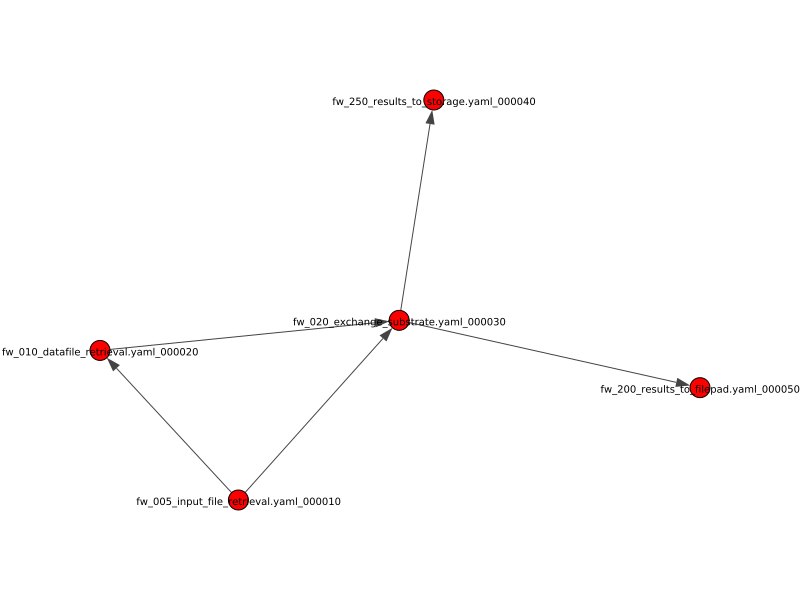

In [78]:
wfb.plot()

## Debug

In [8]:
import igraph

In [18]:
prefix = '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21'
wfb = WorkflowBuilder(os.path.join(prefix,'system.yaml'))
wfb.template_dir = os.path.join(prefix, 'templates')
wfb.build_dir = os.path.join(prefix, 'build')
wfb.initialize_template_engine()
try:
    undefined_variables_output = wfb.show_undefined_variables()
except Exception as e:
    print(e)
    error = e
    raise

INFO:fireworks.utilities.wfb:File '/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/fw/specific/interface/SDS/AU/111/51x30x21/system.yaml contains the sections ['name', 'metadata', 'std', 'transient', 'persistent', 'dependencies'].
INFO:fireworks.utilities.wfb:Graph contains 11 nodes: ['fw_010_datafile_retrieval.yaml', 'fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml', 'fw_055_equilibration_nvt_file_retrieval.yaml', 'fw_060_equilibration_nvt.yaml', 'fw_065_equilibration_npt_file_retrieval.yaml', 'fw_070_equilibration_npt.yaml', 'fw_100_extract_property.yaml', 'fw_150_results_to_bwcloud.yaml', 'fw_200_results_to_filepad.yaml', 'fw_250_results_to_storage.yaml'].
INFO:fireworks.utilities.wfb:Graph contains 16 edges: [('fw_025_minimization_file_retrieval.yaml', 'fw_010_datafile_retrieval.yaml'), ('fw_025_minimization_file_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_datafile_retrieval.yaml', 'fw_030_minimization.yaml'), ('fw_010_datafile_re

In [19]:
wfb.root

1

In [20]:
wfb.g.vs[wfb.root]

igraph.Vertex(<igraph.Graph object at 0x7fdd337e87c8>, 1, {'name': 'fw_025_minimization_file_retrieval.yaml', 'persistent': [{}], 'transient': [{}], 'template': 'fw_025_minimization_file_retrieval.yaml', 'order': 0, 'dist': 0, 'label': 'fw_025_minimization_file_retrieval.yaml', 'label_size': 10})

In [21]:
#igraph.plot(wfb.g, 'graph.pdf')

In [22]:
### Conversion to tree with degenerate vertices
wfb.descend()

INFO:fireworks.utilities.wfb:Current topological order: [1, 0, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:1: fw_025_minimization_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:0: fw_010_datafile_retrieval.yaml.
INFO:fireworks.utilities.wfb:5: fw_065_equilibration_npt_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:3: fw_055_equilibration_nvt_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:2: fw_030_minimization.yaml.
INFO:fireworks.utilities.wfb:4: fw_060_equilibration_nvt.yaml.
INFO:fireworks.utilities.wfb:6: fw_070_equilibration_npt.yaml.
INFO:fireworks.utilities.wfb:7: fw_100_extract_property.yaml.
INFO:fireworks.utilities.wfb:10: fw_250_results_to_storage.yaml.
INFO:fireworks.utilities.wfb:9: fw_200_results_to_filepad.yaml.
INFO:fireworks.utilities.wfb:8: fw_150_results_to_bwcloud.yaml.
INFO:fireworks.utilities.wfb:All processed at node 8, finished.


In [23]:
wfb.root

1

In [24]:
wfb.g.vs[wfb.root]

igraph.Vertex(<igraph.Graph object at 0x7fdd337e87c8>, 1, {'name': 'fw_025_minimization_file_retrieval.yaml', 'persistent': [{}], 'transient': [{}], 'template': 'fw_025_minimization_file_retrieval.yaml', 'order': 0, 'dist': 0, 'label': 'fw_025_minimization_file_retrieval.yaml', 'label_size': 10, 'visited': True})

In [25]:
wfb.build_degenerate_graph()
#wfb.plot()

INFO:fireworks.utilities.wfb:Current topological order: [1, 0, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:1: fw_025_minimization_file_retrieval.yaml.
INFO:fireworks.utilities.wfb:Iterating node 1: fw_025_minimization_file_retrieval.yaml
INFO:fireworks.utilities.wfb:1: fw_025_minimization_file_retrieval.yaml, dist. 0, top.pos. 0 has no parents.
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 1
DEBUG:fireworks.utilities.wfb:  Parent name: None
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/51x30x21/monolayer/initial_config.lammps', 'ewald_accuracy': 

INFO:fireworks.utilities.wfb:  1: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 12*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_025_minimization_file_retrieval.yaml_000010
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': 'interface/SDS/646/AU/111/51x30x21/monolayer/initial_config.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated

INFO:fireworks.utilities.wfb:Added edge 26 - (16-18)
INFO:fireworks.utilities.wfb:Added edge 27 - (16-19)
INFO:fireworks.utilities.wfb:Added edge 28 - (16-20)
INFO:fireworks.utilities.wfb:Added edge 29 - (17-18)
INFO:fireworks.utilities.wfb:Added edge 30 - (17-19)
INFO:fireworks.utilities.wfb:Added edge 31 - (17-20)
INFO:fireworks.utilities.wfb:          Instance 11 - 20 - fw_010_datafile_retrieval.yaml_000020 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 1:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/

INFO:fireworks.utilities.wfb:Added vertex 31 - fw_010_datafile_retrieval.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 32 - fw_030_minimization.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 33 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 34 - fw_060_equilibration_nvt.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 35 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 36 - fw_070_equilibration_npt.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 37 - fw_100_extract_property.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 38 - fw_150_results_to_bwcloud.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 39 - fw_200_results_to_filepad.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added vertex 40 - fw_250_results_to_storage.yaml_000010_000040
INFO:fireworks.utilities.wfb:Added edge 48 - (1-31)
INFO:firew

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:Added edge 108 - (66-70)
INFO:fireworks.utilities.wfb:Added edge 109 - (67-68)
INFO:fireworks.utilities.wfb:Added edge 110 - (67-69)
INFO:fireworks.utilities.wfb:Added edge 111 - (67-70)
INFO:fireworks.utilities.wfb:          Instance 61 - 70 - fw_010_datafile_retrieval.yaml_000070 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 5:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 6:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.inpu

INFO:fireworks.utilities.wfb:Added vertex 81 - fw_010_datafile_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 82 - fw_030_minimization.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 83 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 84 - fw_060_equilibration_nvt.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 85 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 86 - fw_070_equilibration_npt.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 87 - fw_100_extract_property.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 88 - fw_150_results_to_bwcloud.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 89 - fw_200_results_to_filepad.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added vertex 90 - fw_250_results_to_storage.yaml_000010_000090
INFO:fireworks.utilities.wfb:Added edge 128 - (1-81)
INFO:fire

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

INFO:fireworks.utilities.wfb:Added edge 186 - (116-118)
INFO:fireworks.utilities.wfb:Added edge 187 - (116-119)
INFO:fireworks.utilities.wfb:Added edge 188 - (116-120)
INFO:fireworks.utilities.wfb:Added edge 189 - (117-118)
INFO:fireworks.utilities.wfb:Added edge 190 - (117-119)
INFO:fireworks.utilities.wfb:Added edge 191 - (117-120)
INFO:fireworks.utilities.wfb:          Instance 111 - 120 - fw_010_datafile_retrieval.yaml_000120 of class 0 - fw_010_datafile_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 10:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 11:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/ho

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000130:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': '

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000130:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000130:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_055_equilibration_nvt_file_retrieval.yaml_000150:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000170:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_070_equilibration_npt.yaml_000180:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000190:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'eq

INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures

DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '1107_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thicknes

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measure

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000240
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 

INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000010_000120_000230_000240_000250_000260.
INFO:fireworks.utilities

INFO:fireworks.utilities.wfb:Completed node 116: fw_070_equilibration_npt.yaml_000270
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 117, 120, 119, 118, 91, 95, 93, 92, 94, 96, 97, 100, 99, 98, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_eq

INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260_000270_000280
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 280 - fw_100_extract_property.yaml_000280 of class 117 - fw_100_extract_property.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root 

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000290
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 290 - fw_200_results_to_filepad.yaml_000290 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000300
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 300 - fw_150_results_to_bwcloud.yaml_000300 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000290
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 118, 120, 119, 117, 91, 95, 93, 92, 

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000120_000230_000240_000250_000260_000270_000280_000310
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 310 - fw_250_results_to_storage.yaml_000310 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_000280
INFO:fireworks.utilities.wfb:Current topological order: [0, 102, 105, 104, 106, 103, 107, 108, 111, 110, 109, 101, 114, 113, 115, 112, 116, 117, 120, 119, 118, 91, 95, 93, 92, 94

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000110_000320
INFO:fireworks.utilities.wfb:Added edge 192 - (91-126)
INFO:fireworks.utilities.wfb:Added edge 193 - (126-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (94-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (121-125)

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000110:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'n

INFO:fireworks.utilities.wfb:91: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340
INFO:fireworks.utilities.wfb:119: fw_060_equilibration_nvt.yaml_000010_000110_000330_000340, dist. 3, top.pos. 9 has 2 parents with distances [2, 2]:
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000330, dist. 2, top. pos. 3
INFO:fireworks.utilities.wfb:  120: fw_030_minimization.yaml_000340, dist. 2, top. pos. 8
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 120]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibra

INFO:fireworks.utilities.wfb:Completed node 119: fw_250_results_to_storage.yaml_000010_000110_000320_000330_000340_000350
INFO:fireworks.utilities.wfb:Current topological order: [0, 93, 96, 95, 97, 94, 98, 99, 102, 101, 100, 92, 105, 104, 106, 103, 107, 108, 111, 110, 109, 91, 114, 113, 120, 112, 115, 116, 119, 118, 117, 81, 85, 83, 82, 84, 86, 87, 90, 89, 88, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fire

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_250_results_to_storage.yaml_000010_000110_000320_000330_000340_000350_000360
INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (120-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wf

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000370:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state'

INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000360, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000370, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000370, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000370
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_hemicy

INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000100_000410
INFO:fireworks.utilities.wfb:Added edge 192 - (81-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (84-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)

INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000100:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^

INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:          Instance 121 - 430 - fw_030_minimization.yaml_000430 of class 82 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 82, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 82: fw_010_datafile_retrieval.yaml_000110
INFO:fireworks.utilities.wfb:Current topological order: [0, 84, 87, 86, 88, 85, 89, 90, 93, 92, 91, 83, 96, 95, 97, 94, 98, 99, 102, 101, 100, 82, 105, 104, 106, 103, 107, 108, 111, 110, 109, 81, 114, 113, 116, 112, 115, 117, 120, 119, 118, 71, 75, 73, 72, 74, 76, 77, 80, 79, 78, 61, 65, 63, 62, 64, 66, 67, 70, 69, 68, 51, 55, 53, 52, 54, 56, 57, 60, 59, 58, 41, 45, 43, 42, 44, 46, 47, 50, 49, 48, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 's

INFO:fireworks.utilities.wfb:  112: fw_065_equilibration_npt_file_retrieval.yaml_000410, dist. 2, top. pos. 5
INFO:fireworks.utilities.wfb:  116: fw_060_equilibration_nvt.yaml_000440, dist. 3, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 3 at parent [116]
INFO:fireworks.utilities.wfb:  116: fw_060_equilibration_nvt.yaml_000440, dist. 3, top. pos. 6 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_equilibration_nvt.yaml_000440
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_11

INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000100_000410_000420_000430_000440_000450_000460
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000100_000410_000420_000430_000440_000450_000460
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440_000450_000460
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000100_000410_000420_000430_000440_000450_000460
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 460 - fw_100_ext

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000460:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_cylinders_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440_000450_000460.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440_000450_000460
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000100_000410_000420_000430_000440_000450_000460, dist. 6, top.pos. 9 has 2 parents with distances [4, 5]:
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000100_000410_000420_000430_000440_000450_000460_000490
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 490 - fw_250_results_to_storage.yaml_000490 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_000460
INFO:fireworks.utilities.wfb:Current topological order: [0, 84, 87, 86, 88, 85, 89, 90, 93, 92, 91, 83, 96, 95, 97, 94, 98, 99, 102, 101, 100, 82, 105, 104, 106, 103, 107, 108, 1

INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2'

INFO:fireworks.utilities.wfb:101: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_065_eq

INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 201 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 510 - fw_055_equilibration_nvt_file_retrieval.yaml_000510 of class 73 - fw_055_equilibration_nvt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 73, rebuilding topolo

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_c

INFO:fireworks.utilities.wfb:73: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: f

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000090_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000090_000500_000510_000520_000530
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

DEBUG:fireworks.utilities.wfb:  Parent name: fw_060_equilibration_nvt.yaml_000530
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit'

INFO:fireworks.utilities.wfb:74: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_2

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000090_000500_000510_000520_000530_000540_000550
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000090_000500_000510_000520_000530_000540_000550
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000090_000500_000510_000520_000530_000540_000550
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000090_000500_000510_000520_000530_000540_000550
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 550 - fw_100_ext

DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures_unit': 'm', 'sb_multiples': [51, 30, 21], 'sb_normal': 2, 'sb_thickness': 1.51e-08, 'sb

INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_150_results_to_bwcloud.yaml_000010_000090_000500_000510_000520_000530_000540_000550_000570
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 570 - fw_150_results_to_bwcloud.yaml_000570 of class 119 - fw_150_results_to_bwcloud.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 119, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 119: fw_200_results_to_filepad.yaml_000560
INFO:fireworks.utilities.wfb:Current topological order: [0, 75, 78, 77, 79, 76, 80, 81, 84, 83, 82, 74, 87, 86, 88, 85, 89, 90, 93, 92, 91, 73, 96, 95, 97, 94, 98, 99, 102, 101

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000550:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '646_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equ

INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_eq

INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 590 - fw_065_equilibration_npt_file_retrieval.yaml_000590 of class 65 - fw_065_equilibration_npt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 65, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 65: fw_010_datafile_retrieval.yaml_000090
INFO:firework

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000080:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 

INFO:fireworks.utilities.wfb:88: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000080_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000080_000590_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000080_000590_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000080_000590_000600_000610
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_030_minimization.yaml_000010_000080_000610
INFO:fireworks.utilities.wfb:Added edge 192 - (0-127)
INFO:fireworks.utilities.wfb:Added edge 193 - (61-127)
INFO:fireworks.utilities.wfb:Added edge 194 - (120-121)
INFO:fireworks.utilities.wfb:Added edge 195 - (127-121)
INFO:firewor

INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_060_equilibration_nvt.yaml_000010_000080_000600_000610.
INFO:fireworks.utilities.wfb:Iterating node 114: fw_060_equilibration_nvt.yaml_000010_000080_000600_000610
INFO:fireworks.utilities.wfb:114: fw_060_equilibration_nvt.yaml_000010_000080_000600_000610, dist. 3, top.pos. 2 has 2 parents with distances [2, 2]:
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000600, dist. 2, top. pos. 3
INFO:fireworks.utilities.wfb:  120: fw_030_minimization.yaml_000610, dist. 2, top. pos. 8
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 120]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000600, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: 

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000620:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_nam

INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000080_000590_000600_000610_000620_000630_000640
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000080_000590_000600_000610_000620_000630_000640
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000080_000590_000600_000610_000620_000630_000640
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630_000640
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 640 - fw_100_ext

INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630_000640.
INFO:fireworks.utilities.wfb:Iterating node 120: fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630_000640
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000080_000590_000600_000610_000620_000630_000640, dist. 6, top.pos. 8 has 2 parents with distances [4, 5]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000630, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000640, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000640, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBU

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:66: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_2

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000070:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_070_equilibration_npt.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000070_000690
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_060_equilibration_nvt.yaml_000010_000070_000690
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000070_000680_000690
INFO:fireworks.utilities.wfb:Added edge 192 - (51-124)
INFO:fireworks.utilities.wfb:Added edge 193 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 194 - (52-125)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-121)
INFO:fireworks.utilities.wfb:Adde

INFO:fireworks.utilities.wfb:105: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:Added edge 203 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 204 - (122-127)
INFO:fireworks.utilities.wfb:          Instance 124 - 700 - fw_030_minimization.yaml_000700 of class 52 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 52, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 52: fw_010_datafile_retrieval.yaml_000080
INFO:fireworks.utilities.wfb:Current topological order: [0, 57, 60, 59, 61, 58, 62, 63, 66, 65, 64, 56, 69, 68, 70, 67, 71, 72, 75, 74, 73, 55, 78, 77, 79, 76, 80, 81, 84, 83, 82, 54, 87, 86, 88, 85, 89, 90, 93, 92, 91, 53, 96, 95, 97, 94, 98, 99, 102, 101, 100, 52, 105, 104, 106, 103, 107, 108, 111, 110, 109, 51, 117, 113, 118, 11

INFO:fireworks.utilities.wfb:118: fw_060_equilibration_nvt.yaml_000010_000070_000690_000700, dist. 3, top.pos. 10 has 2 parents with distances [2, 2]:
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000690, dist. 2, top. pos. 3
INFO:fireworks.utilities.wfb:  117: fw_030_minimization.yaml_000700, dist. 2, top. pos. 7
INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 117]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000690, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000690
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 's

INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_000710:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name'

INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000070_000680_000690_000700_000710_000720_000730_000740
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 740 - fw_200_results_to_filepad.yaml_000740 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_000740
INFO:fireworks.utilities.wfb:Current topological order: [0, 57, 60, 59, 61, 58, 62, 63, 66, 65, 64, 56, 69, 68, 70, 67, 71, 72, 75, 74, 73, 55, 78, 77, 79, 76, 80, 81, 84, 83, 

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730.
INFO:fireworks.utilities.wfb:Iterating node 119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730
INFO:fireworks.utilities.wfb:119: fw_150_results_to_bwcloud.yaml_000010_000070_000680_000690_000700_000710_000720_000730, dist. 6, top.pos. 9 has 2 parents with distances [4, 5]:
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000260 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibrati

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000730:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '377_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equ

INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibrati

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_065_equilibration_npt_file_retrieval.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000060_000770
INFO:fireworks.utilities.wfb:Added edge 192 - (41-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (44-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-126)

INFO:fireworks.utilities.wfb:97: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 192 - (41-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (42-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 201 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 780 - fw_055_equilibration_nvt_file_retrieval.yaml_000780 of class 43 - fw_055_equilibration_nvt_file_retrieval.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:f

INFO:fireworks.utilities.wfb:101: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 197 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 198 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 199 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-126)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-127)
INFO:fireworks.utilities.wfb:Added edge 202 - (124-125)
INFO:fireworks.utilities.wfb:Added edge 203 - (124-126)
INFO:fireworks.utilities.wfb:Added edge 204 - (124-127)
INFO:fireworks.utilities.wfb:          Instance 121 - 790 - fw_030_minimization.yaml_000790 of class 42 - fw_030_minimization.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 42, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 42: fw_010_datafile_retrieval.yaml_0000

INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 800 - fw_060_equilibration_nvt.yaml_000800 of class 115 - fw_060_equilibration_nvt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 115, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 115: fw_060_equilibration_nvt.yaml_000800
INFO:fireworks.utilities.wfb:Current topo

INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilitie

INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 810 - fw_070_equilibration_npt.yaml_000810 of class 116 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 116, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 116: fw_070_equilibration_npt.yaml_000810
INFO:fireworks.utilities.wfb:Current topological order: [0, 48, 51, 50, 52, 49, 53, 54, 57, 56, 55, 47, 60, 59, 61, 58, 62, 63, 66, 65, 64, 46, 69, 68, 70, 67, 71, 72, 75, 74, 73, 45, 78, 77, 79, 76, 80, 81, 84, 83, 82, 44, 87, 86, 88, 85, 89, 90, 93, 92, 91, 43, 96, 95, 97, 94, 98, 99, 102, 101, 100, 42, 105, 104, 106, 103, 107, 108, 111, 110, 109, 41, 114, 113, 115, 112, 1

INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_eq

INFO:fireworks.utilities.wfb:Current topological order: [0, 48, 51, 50, 52, 49, 53, 54, 57, 56, 55, 47, 60, 59, 61, 58, 62, 63, 66, 65, 64, 46, 69, 68, 70, 67, 71, 72, 75, 74, 73, 45, 78, 77, 79, 76, 80, 81, 84, 83, 82, 44, 87, 86, 88, 85, 89, 90, 93, 92, 91, 43, 96, 95, 97, 94, 98, 99, 102, 101, 100, 42, 105, 104, 106, 103, 107, 108, 111, 110, 109, 41, 114, 113, 115, 112, 116, 118, 120, 119, 117, 31, 35, 33, 32, 34, 36, 37, 40, 39, 38, 21, 25, 23, 22, 24, 26, 27, 30, 29, 28, 11, 15, 13, 12, 14, 16, 17, 20, 19, 18, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

INFO:fireworks.utilities.wfb:114: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:118: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820.
INFO:fireworks.utilities.wfb:Iterating node 120: fw_200_results_to_filepad.yaml_000010_000060_000770_000780_000790_000800_000810_000820
INFO:fireworks.utilities.wfb:120: fw_200_results_to_filepad.yaml_000010_000060_000770_00

INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000250 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000240 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_

INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_000810, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10
INFO:fireworks.utilities.wfb:    Maximum distance 5 at parent [118]
INFO:fireworks.utilities.wfb:  118: fw_100_extract_property.yaml_000820, dist. 5, top. pos. 10 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_000820
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_monola

INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000230 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000270 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000280 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000310 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_000820:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'e

INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:38: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:75: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_m

INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '24:00:00', 'queue': '', 'worker': 'nemo_queue_offline', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_

INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_0

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '220_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measur

INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:29: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_2

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:66: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_2

DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000040:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'st

INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_0

INFO:fireworks.utilities.wfb:    Maximum distance 2 at parent [113, 119]
INFO:fireworks.utilities.wfb:  113: fw_055_equilibration_nvt_file_retrieval.yaml_000960, dist. 2, top. pos. 3 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_055_equilibration_nvt_file_retrieval.yaml_000960
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check'

INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_0

INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:

INFO:fireworks.utilities.wfb:Added edge 192 - (112-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (119-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-123)
INFO:fireworks.utilities.wfb:Added edge 196 - (121-124)
INFO:fireworks.utilities.wfb:Added edge 197 - (121-125)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 200 - (122-125)
INFO:fireworks.utilities.wfb:          Instance 121 - 990 - fw_070_equilibration_npt.yaml_000990 of class 115 - fw_070_equilibration_npt.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 115, rebuilding topological order.
INFO:fireworks.

INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_100_extract_property.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_150_results_to_bwcloud.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_200_results_to_filepad.yaml_000010_000040_000950_000960_000970_000980_000990_001000
INFO:fireworks.utilities.wfb:Added edge 192 - (116-122)
INFO:fireworks.utilities.wfb:Added edge 193 - (116-123)
INFO:fireworks.utilities.wfb:Added edge 194 - (116-124)
INFO:fireworks.utilities.wfb:Added edge 195 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-121)
INFO:fireworks.utilities.wfb:          Instance 122 - 1000 - fw_100_ex

INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '129_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_meas

INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_1

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measu

INFO:fireworks.utilities.wfb:20: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_055_equilibration_nvt_file_retrieval.yaml_000510 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_060_equilibration_nvt.yaml_000530 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_065_equilibration_npt_file_retrieval.yaml_000500 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_070_equilibration_npt.yaml_000540 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_100_extract_property.yaml_000550 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_250_results_to_storage.yaml_000580 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_150_results_to_bwcloud.yaml_000570 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_2

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000030:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': '

INFO:fireworks.utilities.wfb:43: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:44: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:45: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_0

INFO:fireworks.utilities.wfb:111: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:11: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:114: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:113: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:12: fw_030_minimization.yaml_000010_000030.
INFO:fireworks.utilities.wfb:Iterating node 12: fw_030_minimization.yaml_000010_000030
INFO:fireworks.utilities.wfb:12: fw_030_minimization.yaml_000010_000030, dist. 2, top.pos. 34 has 2 parents with distances [0, 1]:
INFO:fireworks.utilities.wfb:  0: fw_025_minimization_file_retrieval.yaml_000010, dist. 0, top. pos. 0
INFO:fireworks.utilities.wfb:  11: fw_010_datafil

INFO:fireworks.utilities.wfb:Current topological order: [0, 21, 24, 23, 25, 22, 26, 27, 30, 29, 28, 20, 33, 32, 34, 31, 35, 36, 39, 38, 37, 19, 42, 41, 43, 40, 44, 45, 48, 47, 46, 18, 51, 50, 52, 49, 53, 54, 57, 56, 55, 17, 60, 59, 61, 58, 62, 63, 66, 65, 64, 16, 69, 68, 70, 67, 71, 72, 75, 74, 73, 15, 78, 77, 79, 76, 80, 81, 84, 83, 82, 14, 87, 86, 88, 85, 89, 90, 93, 92, 91, 13, 96, 95, 97, 94, 98, 99, 102, 101, 100, 12, 105, 104, 106, 103, 107, 108, 111, 110, 109, 11, 114, 113, 115, 112, 116, 117, 120, 119, 118, 1, 5, 3, 2, 4, 6, 7, 10, 9, 8]
INFO:fireworks.utilities.wfb:0: fw_025_minimization_file_retrieval.yaml_000010 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_010_datafile_retrieval.yaml_000130 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:firewor

INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:85: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_100_extract_property.yaml_000820 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_250_results_to_storage.yaml_000850 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_0

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_060_equilibration_nvt.yaml_000010_000030_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_070_equilibration_npt.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_150_results_to_bwcloud.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000030_001040_001050_001060_001070
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:15: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibrati

INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measures

INFO:fireworks.utilities.wfb:45: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:48: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:47: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:46: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:18: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:51: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:50: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_

INFO:fireworks.utilities.wfb:115: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:112: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:116: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080.
INFO:fireworks.utilities.wfb:Iterating node 117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080
INFO:fireworks.utilities.wfb:117: fw_100_extract_property.yaml_000010_000030_001040_001050_001060_001070_001080, dist. 5, top.pos. 7 has 1 parents with distances [4]:
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_001080, dist. 4, top. pos. 6
INFO:fireworks.utilities.wfb:    Maximum distance 4 at parent [116]
INFO:fireworks.utilities.wfb:  116: fw_070_equilibration_npt.yaml_001080, dist. 4, top. pos. 6 selec

INFO:fireworks.utilities.wfb:24: fw_030_minimization.yaml_000160 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:25: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:26: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:27: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:30: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:29: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_0

INFO:fireworks.utilities.wfb:92: fw_150_results_to_bwcloud.yaml_000840 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:13: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:97: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:94: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_200_results_to_filepad.yaml_000010_000030_001040_001050_001060_001070_001080_001090_001100
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1100 - fw_200_results_to_filepad.yaml_001100 of class 120 - fw_200_results_to_filepad.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 120, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 120: fw_200_results_to_filepad.yaml_001100
INFO:fireworks.utilities.wfb:Current topological order: [0, 21, 24, 23, 25, 22, 26, 27, 30, 29, 28, 20, 33, 32, 34, 31, 35, 36, 39, 38, 37, 19, 42, 41, 43, 40, 44, 45, 48, 47,

INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:84: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:83: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:82: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:87: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:86: fw_055_equilibrati

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measu

INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_1

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_100_extract_property.yaml_001090:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_monolayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'eq

INFO:fireworks.utilities.wfb:52: fw_060_equilibration_nvt.yaml_000440 has been visited before, move on.
INFO:fireworks.utilities.wfb:49: fw_065_equilibration_npt_file_retrieval.yaml_000410 has been visited before, move on.
INFO:fireworks.utilities.wfb:53: fw_070_equilibration_npt.yaml_000450 has been visited before, move on.
INFO:fireworks.utilities.wfb:54: fw_100_extract_property.yaml_000460 has been visited before, move on.
INFO:fireworks.utilities.wfb:57: fw_250_results_to_storage.yaml_000490 has been visited before, move on.
INFO:fireworks.utilities.wfb:56: fw_150_results_to_bwcloud.yaml_000480 has been visited before, move on.
INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000470 has been visited before, move on.
INFO:fireworks.utilities.wfb:17: fw_010_datafile_retrieval.yaml_000090 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000520 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibrati

INFO:fireworks.utilities.wfb:1: fw_010_datafile_retrieval.yaml_000020 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020.
INFO:fireworks.utilities.wfb:Iterating node 5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020
INFO:fireworks.utilities.wfb:5: fw_065_equilibration_npt_file_retrieval.yaml_000010_000020, dist. 2, top.pos. 22 has 1 parents with distances [1]:
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 21
INFO:fireworks.utilities.wfb:    Maximum distance 1 at parent [1]
INFO:fireworks.utilities.wfb:  1: fw_010_datafile_retrieval.yaml_000020, dist. 1, top. pos. 21 selected as immediate parent
INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_010_datafile_retrieval.yaml_000020
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:

INFO:fireworks.utilities.wfb:17: fw_055_equilibration_nvt_file_retrieval.yaml_000150 has been visited before, move on.
INFO:fireworks.utilities.wfb:19: fw_060_equilibration_nvt.yaml_000170 has been visited before, move on.
INFO:fireworks.utilities.wfb:16: fw_065_equilibration_npt_file_retrieval.yaml_000140 has been visited before, move on.
INFO:fireworks.utilities.wfb:20: fw_070_equilibration_npt.yaml_000180 has been visited before, move on.
INFO:fireworks.utilities.wfb:21: fw_100_extract_property.yaml_000190 has been visited before, move on.
INFO:fireworks.utilities.wfb:24: fw_250_results_to_storage.yaml_000220 has been visited before, move on.
INFO:fireworks.utilities.wfb:23: fw_150_results_to_bwcloud.yaml_000210 has been visited before, move on.
INFO:fireworks.utilities.wfb:22: fw_200_results_to_filepad.yaml_000200 has been visited before, move on.
INFO:fireworks.utilities.wfb:14: fw_010_datafile_retrieval.yaml_000120 has been visited before, move on.
INFO:fireworks.utilities.wfb:27

INFO:fireworks.utilities.wfb:85: fw_200_results_to_filepad.yaml_000830 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000050 has been visited before, move on.
INFO:fireworks.utilities.wfb:90: fw_030_minimization.yaml_000880 has been visited before, move on.
INFO:fireworks.utilities.wfb:89: fw_055_equilibration_nvt_file_retrieval.yaml_000870 has been visited before, move on.
INFO:fireworks.utilities.wfb:91: fw_060_equilibration_nvt.yaml_000890 has been visited before, move on.
INFO:fireworks.utilities.wfb:88: fw_065_equilibration_npt_file_retrieval.yaml_000860 has been visited before, move on.
INFO:fireworks.utilities.wfb:92: fw_070_equilibration_npt.yaml_000900 has been visited before, move on.
INFO:fireworks.utilities.wfb:93: fw_100_extract_property.yaml_000910 has been visited before, move on.
INFO:fireworks.utilities.wfb:96: fw_250_results_to_storage.yaml_000940 has been visited before, move on.
INFO:fireworks.utilities.wfb:95: fw_15

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_055_equilibration_nvt_file_retrieval.yaml_000010_000020_001140
INFO:fireworks.utilities.wfb:Added vertex 122 - fw_060_equilibration_nvt.yaml_000010_000020_001140
INFO:fireworks.utilities.wfb:Added vertex 123 - fw_070_equilibration_npt.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 124 - fw_100_extract_property.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 125 - fw_150_results_to_bwcloud.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_200_results_to_filepad.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added vertex 127 - fw_250_results_to_storage.yaml_000010_000020_001130_001140
INFO:fireworks.utilities.wfb:Added edge 192 - (1-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 194 - (2-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (115-123)
INFO:fireworks.utilities.wfb:Added 

INFO:fireworks.utilities.wfb:60: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:70:

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'nodes': 2, 'ppn': 20, 'walltime': '4:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_010_datafile_retrieval.yaml_000020:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_ch

INFO:fireworks.utilities.wfb:10: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_2

INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_001030 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:Added vertex 125 - fw_200_results_to_filepad.yaml_000010_000020_001130_001140_001150_001160
INFO:fireworks.utilities.wfb:Added vertex 126 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160
INFO:fireworks.utilities.wfb:Added edge 192 - (113-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (114-121)
INFO:fireworks.utilities.wfb:Added edge 194 - (112-122)
INFO:fireworks.utilities.wfb:Added edge 195 - (121-122)
INFO:fireworks.utilities.wfb:Added edge 196 - (122-123)
INFO:fireworks.utilities.wfb:Added edge 197 - (122-124)
INFO:fireworks.utilities.wfb:Added edge 198 - (122-125)
INFO:fireworks.utilities.wfb:Added edge 199 - (122-126)
INFO:fireworks.utilities.wfb:Added edge 200 - (123-124)
INFO:fireworks.utilities.wfb:Added edge 201 - (123-125)
INFO:fireworks.utilities.wfb:Added edge 202 - (123-126)
INFO:fireworks.utilities.wfb:          Instance 121 - 1160 - fw_060_equilibration_nvt.yaml_001160 of class 115 - fw_060_equilibration_nvt.yaml

INFO:fireworks.utilities.wfb:65: fw_150_results_to_bwcloud.yaml_000660 has been visited before, move on.
INFO:fireworks.utilities.wfb:64: fw_200_results_to_filepad.yaml_000650 has been visited before, move on.
INFO:fireworks.utilities.wfb:6: fw_010_datafile_retrieval.yaml_000070 has been visited before, move on.
INFO:fireworks.utilities.wfb:69: fw_030_minimization.yaml_000700 has been visited before, move on.
INFO:fireworks.utilities.wfb:68: fw_055_equilibration_nvt_file_retrieval.yaml_000690 has been visited before, move on.
INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_25

DEBUG:fireworks.utilities.wfb:  Child persistent context updates [{}]
DEBUG:fireworks.utilities.wfb:  Child transient context updates [{'worker': 'nemo_queue_offline', 'walltime': '24:00:00'}]
INFO:fireworks.utilities.wfb:  Iterating parent fw_060_equilibration_nvt.yaml_001160:
INFO:fireworks.utilities.wfb:    Iterating persitent content update 0:
DEBUG:fireworks.utilities.wfb:      Current persistent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name':

INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_250_results_to_storage.yaml_000400 has been visited before, move on.
INFO:fireworks.utilities.wfb:38: fw_150_results_to_bwcloud.yaml_000390 has been visited before, move on.
INFO:fireworks.utilities.wfb:37: fw_200_results_to_filepad.yaml_000380 has been visited before, move on.
INFO:fireworks.utilities.wfb:9: fw_010_datafile_retrieval.yaml_000100 has been visited before, move on.
INFO:fireworks.utilities.wfb:42: fw_030_minimization.yaml_000430 has been visited before, move on.
INFO:fireworks.utilities.wfb:41: fw_055_equilibration_nvt_file_retrieval.yaml_000420 has been visited before, move on.
INFO:fireworks.utilities.wfb:43: fw_0

INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equilibration_npt_file_retrieval.yaml_001040 has been visited before, move on.
INFO:fireworks.utilities.wfb:107: fw_070_equilibration_npt.yaml_001080 has been visited before, move on.
INFO:fireworks.utilities.wfb:108: fw_100_extract_property.yaml_001090 has been visited before, move on.
INFO:fireworks.utilities.wfb:111: fw_250_results_to_storage.yaml_001120 has been visited before, move on.
INFO:fireworks.utilities.wfb:110: fw_150_results_to_bwcloud.yaml_001110 has been visited before, move on.
INFO:fireworks.utilities.wfb:109: fw_200_results_to_filepad.yaml_001100 has been visited before, move on.
INFO:fireworks.utilities.wfb

INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 37, 9, 42, 41, 43, 40, 44, 45, 48, 47, 46, 8, 51, 50, 52, 49, 53, 54, 57, 56, 55, 7, 60, 59, 61, 58, 62, 63, 66, 65, 64, 6, 69, 68, 70, 67, 71, 72, 75, 74, 73, 5, 78, 77, 79, 76, 80, 81, 84, 83, 82, 4, 87, 86, 88, 85, 89, 90, 93, 92, 91, 3, 96, 95, 97, 94, 98, 99, 102, 101, 100, 2, 105, 104, 106, 103, 107, 108, 111, 110, 109, 1, 114, 113, 115, 112, 116, 11

INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibration_nvt_file_retrieval.yaml_000780 has been visited before, move on.
INFO:fireworks.utilities.wfb:79: fw_060_equilibration_nvt.yaml_000800 has been visited before, move on.
INFO:fireworks.utilities.wfb:76: fw_065_equilibration_npt_file_retrieval.yaml_000770 has been visited before, move on.
INFO:fireworks.utilities.wfb:80: fw_070_equilibration_npt.yaml_000810 has been visited before, move on.
INFO:fireworks.utilities.wfb:81: fw_

INFO:fireworks.utilities.wfb:      Iterating transient content update 0:
DEBUG:fireworks.utilities.wfb:        Current transient context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane': 111, 'sb_measures': [1.48e-08, 1.51e-08, 1.51e-08], 'sb_measure

INFO:fireworks.utilities.wfb:55: fw_200_results_to_filepad.yaml_000560 has been visited before, move on.
INFO:fireworks.utilities.wfb:7: fw_010_datafile_retrieval.yaml_000080 has been visited before, move on.
INFO:fireworks.utilities.wfb:60: fw_030_minimization.yaml_000610 has been visited before, move on.
INFO:fireworks.utilities.wfb:59: fw_055_equilibration_nvt_file_retrieval.yaml_000600 has been visited before, move on.
INFO:fireworks.utilities.wfb:61: fw_060_equilibration_nvt.yaml_000620 has been visited before, move on.
INFO:fireworks.utilities.wfb:58: fw_065_equilibration_npt_file_retrieval.yaml_000590 has been visited before, move on.
INFO:fireworks.utilities.wfb:62: fw_070_equilibration_npt.yaml_000630 has been visited before, move on.
INFO:fireworks.utilities.wfb:63: fw_100_extract_property.yaml_000640 has been visited before, move on.
INFO:fireworks.utilities.wfb:66: fw_250_results_to_storage.yaml_000670 has been visited before, move on.
INFO:fireworks.utilities.wfb:65: fw_15

INFO:fireworks.utilities.wfb:Degeneracy (persistent*transient): 1*1 = 12
DEBUG:fireworks.utilities.wfb:  Parent name: fw_100_extract_property.yaml_001180
DEBUG:fireworks.utilities.wfb:  Parent context: {'machine': 'NEMO', 'nodes': 8, 'ppn': 20, 'walltime': '48:00:00', 'queue': '', 'worker': 'nemo_noqueue', 'remote_user': 'testuser', 'remote_dir': '/mnt/dat/work/testuser/interface/SDS/646/AU/111/51x30x21/monolayer', 'ssh_key': '/home/fr/fr_fr/fr_jh1130/.ssh/testuser-bwCloud', 'coeff_identifier': 'SDS/in/H2O/on/AU/coeff/hybrid/lj/charmmfsw/coul/long.input', 'datafile_identifier': '75_SDS_on_AU_111_51x30x2_bilayer_with_counterion_10ns.lammps', 'ewald_accuracy': 0.0001, 'coulomb_cutoff': 8.0, 'skin_distance': 3.0, 'neigh_delay': 2, 'neigh_every': 1, 'neigh_check': 1, 'system_name': '646_SDS_on_AU_111_51x30x21_monolayer', 'state': 'equilibrated', 'pbc': 111, 'pressure': 1, 'pressure_unit': 'atm', 'sb_name': 'AU_111_51x30x21', 'sb_area': 2.2351e-16, 'sb_area_unit': 'm^2', 'sb_crystal_plane':

INFO:fireworks.utilities.wfb:29: fw_150_results_to_bwcloud.yaml_000300 has been visited before, move on.
INFO:fireworks.utilities.wfb:28: fw_200_results_to_filepad.yaml_000290 has been visited before, move on.
INFO:fireworks.utilities.wfb:10: fw_010_datafile_retrieval.yaml_000110 has been visited before, move on.
INFO:fireworks.utilities.wfb:33: fw_030_minimization.yaml_000340 has been visited before, move on.
INFO:fireworks.utilities.wfb:32: fw_055_equilibration_nvt_file_retrieval.yaml_000330 has been visited before, move on.
INFO:fireworks.utilities.wfb:34: fw_060_equilibration_nvt.yaml_000350 has been visited before, move on.
INFO:fireworks.utilities.wfb:31: fw_065_equilibration_npt_file_retrieval.yaml_000320 has been visited before, move on.
INFO:fireworks.utilities.wfb:35: fw_070_equilibration_npt.yaml_000360 has been visited before, move on.
INFO:fireworks.utilities.wfb:36: fw_100_extract_property.yaml_000370 has been visited before, move on.
INFO:fireworks.utilities.wfb:39: fw_2

INFO:fireworks.utilities.wfb:98: fw_070_equilibration_npt.yaml_000990 has been visited before, move on.
INFO:fireworks.utilities.wfb:99: fw_100_extract_property.yaml_001000 has been visited before, move on.
INFO:fireworks.utilities.wfb:102: fw_250_results_to_storage.yaml_001030 has been visited before, move on.
INFO:fireworks.utilities.wfb:101: fw_150_results_to_bwcloud.yaml_001020 has been visited before, move on.
INFO:fireworks.utilities.wfb:100: fw_200_results_to_filepad.yaml_001010 has been visited before, move on.
INFO:fireworks.utilities.wfb:2: fw_010_datafile_retrieval.yaml_000030 has been visited before, move on.
INFO:fireworks.utilities.wfb:105: fw_030_minimization.yaml_001060 has been visited before, move on.
INFO:fireworks.utilities.wfb:104: fw_055_equilibration_nvt_file_retrieval.yaml_001050 has been visited before, move on.
INFO:fireworks.utilities.wfb:106: fw_060_equilibration_nvt.yaml_001070 has been visited before, move on.
INFO:fireworks.utilities.wfb:103: fw_065_equil

INFO:fireworks.utilities.wfb:Added vertex 121 - fw_250_results_to_storage.yaml_000010_000020_001130_001140_001150_001160_001170_001180_001210
INFO:fireworks.utilities.wfb:Added edge 192 - (116-121)
INFO:fireworks.utilities.wfb:Added edge 193 - (118-121)
INFO:fireworks.utilities.wfb:          Instance 121 - 1210 - fw_250_results_to_storage.yaml_001210 of class 117 - fw_250_results_to_storage.yaml created.
INFO:fireworks.utilities.wfb:      Completed transient content update 0:
INFO:fireworks.utilities.wfb:    Completed persitent content update 0:
INFO:fireworks.utilities.wfb:Identified root fw_025_minimization_file_retrieval.yaml_000010.
INFO:fireworks.utilities.wfb:      Modified graph at node 117, rebuilding topological order.
INFO:fireworks.utilities.wfb:Completed node 117: fw_100_extract_property.yaml_001180
INFO:fireworks.utilities.wfb:Current topological order: [0, 12, 15, 14, 16, 13, 17, 18, 21, 20, 19, 11, 24, 23, 25, 22, 26, 27, 30, 29, 28, 10, 33, 32, 34, 31, 35, 36, 39, 38, 3

INFO:fireworks.utilities.wfb:70: fw_060_equilibration_nvt.yaml_000710 has been visited before, move on.
INFO:fireworks.utilities.wfb:67: fw_065_equilibration_npt_file_retrieval.yaml_000680 has been visited before, move on.
INFO:fireworks.utilities.wfb:71: fw_070_equilibration_npt.yaml_000720 has been visited before, move on.
INFO:fireworks.utilities.wfb:72: fw_100_extract_property.yaml_000730 has been visited before, move on.
INFO:fireworks.utilities.wfb:75: fw_250_results_to_storage.yaml_000760 has been visited before, move on.
INFO:fireworks.utilities.wfb:74: fw_150_results_to_bwcloud.yaml_000750 has been visited before, move on.
INFO:fireworks.utilities.wfb:73: fw_200_results_to_filepad.yaml_000740 has been visited before, move on.
INFO:fireworks.utilities.wfb:5: fw_010_datafile_retrieval.yaml_000060 has been visited before, move on.
INFO:fireworks.utilities.wfb:78: fw_030_minimization.yaml_000790 has been visited before, move on.
INFO:fireworks.utilities.wfb:77: fw_055_equilibratio

In [30]:
show_attributes_output = wfb.show_attributes()

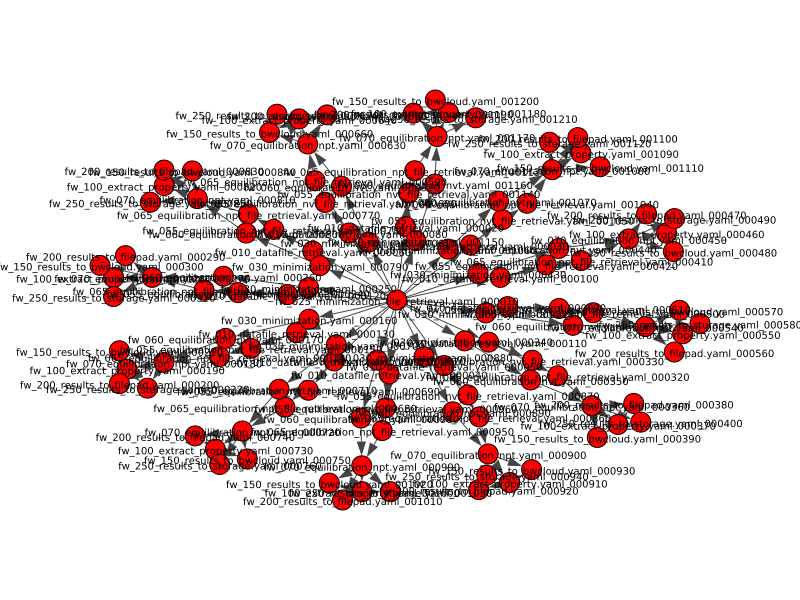

In [31]:
wfb.plot()